# **Импорт библиотек**

In [59]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotifydata/dataset.csv


# **Описание столбцов**
* **id**: Уникальный индекс/номер песни. Начинается с 0 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор песни.
* **track_id**: Уникальный ид песни.
* **artists**: Авторы песни.
* **album_name**: Название альбома, в которую входит песня.
* **track_name**: Название песни.
* **popularity**: Популярность песни.
* **duration_ms**: Длительность песни в милисекундах.
* **explicit**: Содержит ли ненормативную лексику и\или острые темы.
* **danceability**: Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0,0 означает, что трек наименее танцевален, а 1 - что он наиболее танцевален.
* **energy**: "Энергия" песни. Чем ближе к 1, тем быстрее кажется песня. Пример
        Высокие показатели энергии (ближе к 1,0) — треки кажутся быстрыми, громкими и шумными.
        Низкие показатели энергии (ближе к 0,0) — треки звучат более мягкими и расслабленными.
* **key**: Тональность песни. Предполагаемый общий тон трека. Целые числа сопоставляются с тонами, используя стандартное обозначение класса тональности. Например, 0 = C, 2 = D и т.д. Если тональность не была обнаружена, значение равно -1.
* **loudness**: Общая громкость трека в децибелах (дБ). Значения громкости усредняются по всему треку и используются для сравнения относительной громкости трека. Громкость - это качество звука, которое является основным психологическим показателем физической силы (амплитуды). Типичные значения находятся в диапазоне от -60 до 0 дБ.
* **mode**: Режим указывает на модальность (мажорную или минорную) трека, тип гаммы, на основе которой формируется его мелодическое содержание. Мажор обозначается цифрой 1, а минор - 0.
* **speechiness**: Вероятность того, что трек - это только слова (книга, подкаст) (1 трэк состоит только из слов, 0 нет).
* **acousticness**: Показатель достоверности от 0,0 до 1,0 для определения того, является ли трек акустическим. 1 означает высокую степень уверенности в том, что трек является акустическим.
* **instrumentalness**: Определяет, содержит ли трек вокал. В данном контексте звуки "ОХ" и "ААА" рассматриваются как инструментальные. Треки в стиле рэп или устной речи явно содержат вокал. Чем ближе значение инструментальности к 1, тем больше вероятность того, что трек не содержит вокала. Значения выше 0,5 предназначены для представления инструментальных композиций, но достоверность повышается, когда значение приближается к 1,0.
* **liveness**: Определяет присутствие аудитории на записи. Более высокие значения живучести означают повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек был записан вживую.
* **valence**: Показатель от 0,0 до 1,0, описывающий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, жизнерадостные, эйфорические), в то время как треки с низкой валентностью звучат более негативно (например, грустные, подавленные, злые).
* **tempo**: Общий предполагаемый темп трека в ударах в минуту (BPM).
* **time_signature**: Такт песни.
* **track_genre**: Жанр песни.

In [60]:
spotify = pd.read_csv('/kaggle/input/spotifydata/dataset.csv')

In [61]:
spotify = spotify.rename(columns={'Unnamed: 0': 'id'})
spotify = spotify.set_index('id')
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
id,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


# **Вывод количества пустых значений**

In [62]:
NaNs = spotify.isna().sum()
NaNs

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# **Работа с пустыми значениями**

Удалим пустое значение

In [63]:
spotify = spotify.dropna(subset=['artists'])
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
id,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


Выведем оставшиеся пустые значения

In [64]:
NaNs = spotify.isna().sum()
NaNs

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# ***EDA, ресерч-анализ и Feature Engineering (Начало)***

# **Вывод корреляций**

In [65]:
spotify_v = spotify.copy()
from sklearn.preprocessing import LabelEncoder
categorical_cols = spotify_v.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    spotify_v[col] = le.fit_transform(spotify_v[col])
    label_encoders[col] = le
spotify_v.corr()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,1.000000,0.003159,0.007114,0.005537,0.003230,-0.002966,0.004160,-0.000231,-0.000498,-0.003045,0.001657,-0.006396,-0.000465,0.001348,-0.000126,-0.003256,0.001770,-0.008131,-0.003742,-0.003890
artists,0.003159,1.000000,0.090176,0.038936,0.003636,-0.021576,-0.004677,-0.009925,-0.005582,0.006619,-0.018846,-0.002974,-0.016229,-0.004218,0.016069,-0.007987,0.001019,0.001168,-0.008208,-0.008688
album_name,0.007114,0.090176,1.000000,0.303307,0.042501,0.006693,0.000371,-0.019166,-0.044731,-0.006886,-0.032242,-0.000449,-0.013397,0.033419,0.001301,-0.027714,-0.041702,-0.003290,-0.001226,0.003505
track_name,0.005537,0.038936,0.303307,1.000000,0.011935,0.004156,-0.005846,-0.020867,-0.039642,-0.003909,-0.012525,0.006095,-0.025665,0.035877,-0.024621,-0.005675,-0.016551,0.005582,-0.002536,0.001860
popularity,0.003230,0.003636,0.042501,0.011935,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076,0.032696
duration_ms,-0.002966,-0.021576,0.006693,0.004156,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229,-0.032822
explicit,0.004160,-0.004677,0.000371,-0.005846,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387,-0.054827
danceability,-0.000231,-0.009925,-0.019166,-0.020867,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219,0.003570
energy,-0.000498,-0.005582,-0.044731,-0.039642,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127,-0.056175
key,-0.003045,0.006619,-0.006886,-0.003909,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064,-0.005509


Выведем корреляций только с полем popularity

In [66]:
sorted(dict(spotify_v.corr()['popularity']).items(), key=lambda item: item[1], reverse = True)

[('popularity', 1.0),
 ('loudness', 0.05042041812426425),
 ('explicit', 0.04407821057291176),
 ('album_name', 0.042500674675937135),
 ('danceability', 0.03544354596134648),
 ('track_genre', 0.03269569082594992),
 ('time_signature', 0.03107596779341526),
 ('tempo', 0.013211888443029937),
 ('track_name', 0.011934954988767154),
 ('artists', 0.003635788707288769),
 ('track_id', 0.0032302881465537145),
 ('energy', 0.0010531126538152788),
 ('key', -0.00384698730025534),
 ('liveness', -0.005396753083609593),
 ('duration_ms', -0.007129199829767871),
 ('mode', -0.01394836724290687),
 ('acousticness', -0.025458057255118086),
 ('valence', -0.04052176220204288),
 ('speechiness', -0.04492998314226954),
 ('instrumentalness', -0.09514665337271314)]

Так же выведем среднюю популярность по всем трекам

In [67]:
spotify['popularity'].mean()

33.23882665637418

# **Построение графиков**

> ***ГИПОТЕЗА: Проверим все кореляции, составим графики, найдём связанные характеристики, которые кореллируют друг с другом, а также если будут выявлены какие-либо неожиданные связи изучить их причины***

> ***Проверим поле loudness***

Выведем все уникальные значения громкости и сформируем обобщённый список громкостей

In [68]:
unique_loudness = sorted(spotify['loudness'].unique().tolist())
unique_loudness = [[x, x+1] for x in range(round(min(unique_loudness)), round(max(unique_loudness))+1)]
unique_loudness

[[-50, -49],
 [-49, -48],
 [-48, -47],
 [-47, -46],
 [-46, -45],
 [-45, -44],
 [-44, -43],
 [-43, -42],
 [-42, -41],
 [-41, -40],
 [-40, -39],
 [-39, -38],
 [-38, -37],
 [-37, -36],
 [-36, -35],
 [-35, -34],
 [-34, -33],
 [-33, -32],
 [-32, -31],
 [-31, -30],
 [-30, -29],
 [-29, -28],
 [-28, -27],
 [-27, -26],
 [-26, -25],
 [-25, -24],
 [-24, -23],
 [-23, -22],
 [-22, -21],
 [-21, -20],
 [-20, -19],
 [-19, -18],
 [-18, -17],
 [-17, -16],
 [-16, -15],
 [-15, -14],
 [-14, -13],
 [-13, -12],
 [-12, -11],
 [-11, -10],
 [-10, -9],
 [-9, -8],
 [-8, -7],
 [-7, -6],
 [-6, -5],
 [-5, -4],
 [-4, -3],
 [-3, -2],
 [-2, -1],
 [-1, 0],
 [0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 6]]

График популярности в зависимсоти от поля *loudness*

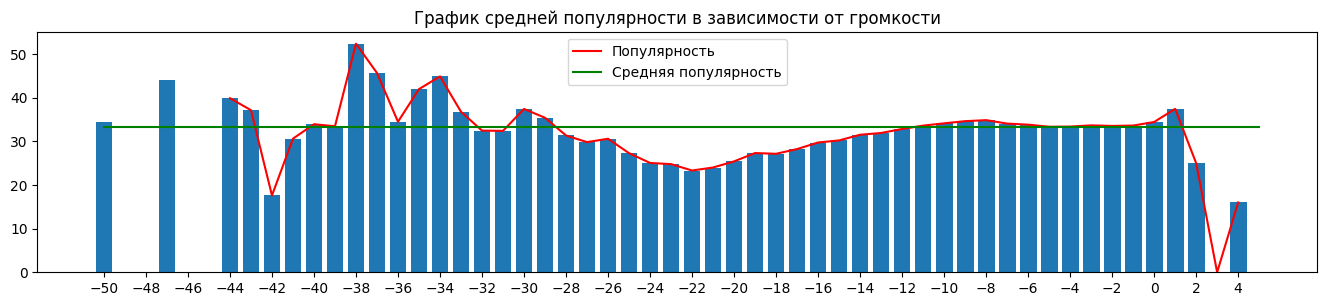

In [69]:
ax = plt.axes([0, 0, 2, 0.5])
mean_popularity = []
for loudness in unique_loudness:
    mean_popularity.append(spotify.loc[(spotify['loudness'] > loudness[0]) & (spotify['loudness'] < loudness[1]), 'popularity'].mean())
ax.bar([x[0] for x in unique_loudness], mean_popularity)
ax.plot([x[0] for x in unique_loudness], mean_popularity, color='red', label='Популярность')
ax.plot([x[0] for x in unique_loudness], [33.23882665637418]*len([x[0] for x in unique_loudness]), color='green', label='Средняя популярность')
ax.set_title('График средней популярности в зависимости от громкости')
ax.set_xticks([x for x in range(-50, 6, 2)])
ax.legend()
plt.show()

Среднее значение популярности - это условное нормальное значение, в идеальных условиях все треки должны иметь среднюю популярность. Но не во всех диапазонах популярность средняя, запомним аномальные значения, а именно промежутки:
1) -38, -29 больше среднего
2) -28, -12 меньше среднего

> ***ВЫВОД:***
> ***
> 1) Трэки с громкостью в промежутке от -10дб до 0дб имеют среднюю популярность
> 2) Трэки с громкостью в промежутке от -28дб до -12дб имеют популярность ниже среднего
> 3) Трэки с громкостью в промежутке от -38дб до -29дб имеют популярность выше среднего
> ***
>Крайние значения не рассматриваем, выборка в них гораздо меньше, чем в основном промежутке

> ***Проверем поле explicit***

График популярности в зависимсоти от наличия ненормативной лексики\острых тем в треке

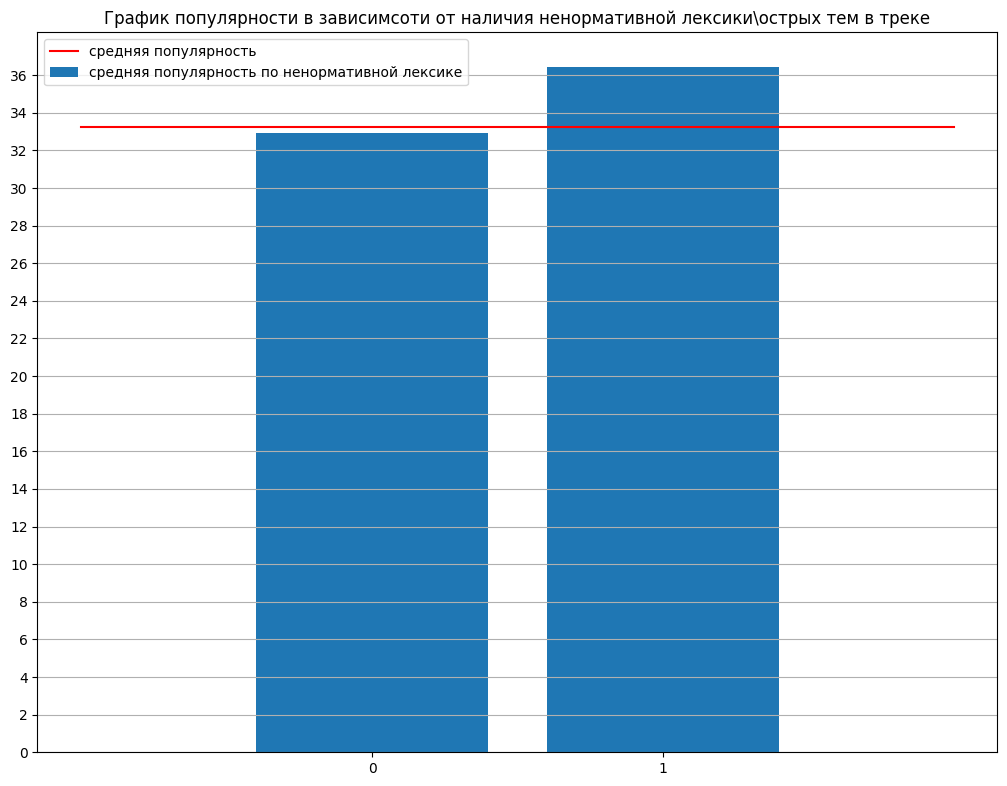

In [70]:
ax = plt.axes([0, 0, 1.5, 1.5])
ax.bar(sorted(spotify['explicit'].unique().tolist()), [spotify.loc[spotify['explicit'] == 0, 'popularity'].mean(), spotify.loc[spotify['explicit'] == 1, 'popularity'].mean()], label='средняя популярность по ненормативной лексике')
ax.plot([-1, 0, 1, 2], [33.23882665637418]*4, color='red', label='средняя популярность')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 2, 1)])
ax.set_yticks([x for x in range(0, 38, 2)])
ax.set_title('График популярности в зависимсоти от наличия ненормативной лексики\острых тем в треке')
ax.grid(axis='y')
ax.legend()
plt.show()

> ***ВЫВОД:***
> ***
> В целом наличие ненормативной лексики\острых тем в треке увеличивает популярность сверх среднего, но не намного, всего на 4 пункта

> ***Проверем поле album_name***

In [71]:
ph = [re.split(r'[ \n]', x) for x in spotify['album_name'].tolist()]
all_album_names = []
for i in range(len(ph)):
    for j in range(len(ph[i])):
        phphph=re.sub(r'[\[\]()?!.,:;\'\"\t-]', '', ph[i][j])
        if len(phphph)>3:
            all_album_names.append(phphph)
from collections import Counter
c = Counter(all_album_names)
words = c.most_common(10)
for i in range(len(words)):
    words[i] = list(words[i])[0]
words

['2022',
 'Vivo',
 'Christmas',
 'Original',
 'Soundtrack',
 'Hits',
 'Edition',
 'Motion',
 'Picture',
 'Best']

Проверим влияют ли как-то эти слова в альбомах на популярность.

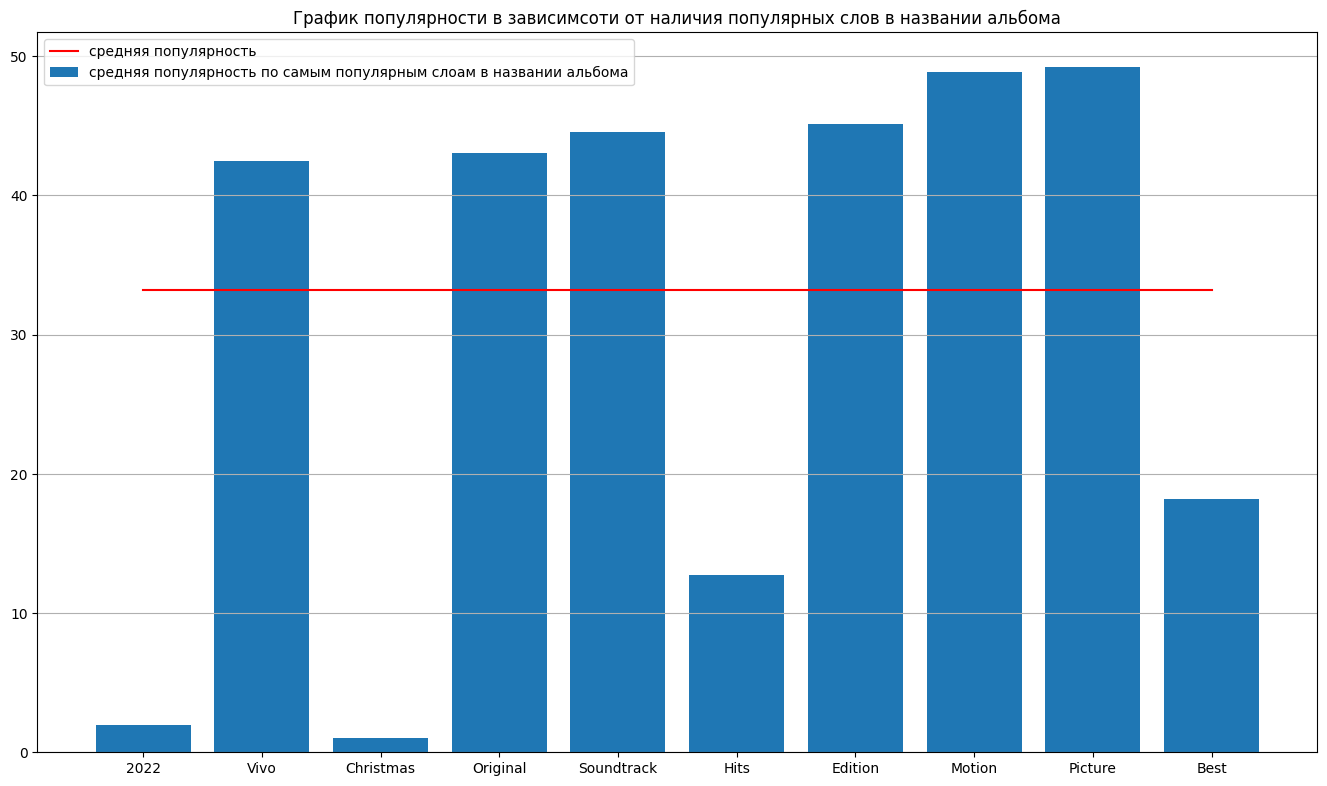

In [72]:
ax = plt.axes([0, 0, 2, 1.5])
popularity_words = []
for word in words:
    popularity_words.append(spotify.loc[spotify['album_name'].str.contains(word), 'popularity'].mean())
ax.bar(words, popularity_words, label='средняя популярность по самым популярным слоам в названии альбома')
ax.plot(words, [33.23882665637418]*len(words), color='red', label='средняя популярность')
ax.set_title('График популярности в зависимсоти от наличия популярных слов в названии альбома')
ax.grid(axis='y')
ax.legend()
plt.show()

Понятной корреляции с частой встречи слов в названии альбома и популярностью трека нету,но некоторые слова опредёлнно являются маркерами популярности трека выше среднего, среди 1000 самых популярных слов, найдём наиболее влияющие на популярность.

In [73]:
words = c.most_common(1000)
for i in range(len(words)):
    words[i] = list(words[i])[0]
words

['2022',
 'Vivo',
 'Christmas',
 'Original',
 'Soundtrack',
 'Hits',
 'Edition',
 'Motion',
 'Picture',
 'Best',
 'Music',
 'Halloween',
 'Deluxe',
 'Love',
 'Rock',
 'Live',
 'Songs',
 'feat',
 'Perreo',
 'Party',
 'From',
 'Remix',
 'Remastered',
 'Version',
 'Your',
 'Classics',
 'Country',
 'Night',
 'Piano',
 'Collection',
 'para',
 'Time',
 'Good',
 'Kids',
 'World',
 'Tunes',
 'Anniversary',
 'Life',
 'Dance',
 'with',
 'Remixes',
 'Greatest',
 'Recording',
 'from',
 'Acústico',
 'Cast',
 'Fiesta',
 'Baby',
 'Metal',
 'Expanded',
 'Playlist',
 'Complete',
 'Classical',
 'Tenebroso',
 'Mozart',
 'Noise',
 'This',
 'Sleep',
 'Album',
 'Back',
 'Home',
 'Alternative',
 'House',
 'Chill',
 'Hardcore',
 'With',
 'Special',
 'Years',
 'Very',
 'Broadway',
 'Black',
 'Down',
 'More',
 'Happy',
 'Like',
 'Volume',
 'Part',
 'Vibes',
 'Season',
 'Soul',
 'What',
 'Amor',
 'Sounds',
 'Just',
 'Ultimate',
 'Heart',
 'Sound',
 'Again',
 'That',
 'Days',
 'Little',
 'Blue',
 'Anos',
 'Never'

In [74]:
names_and_popularity = [[x, 0] for x in words]
for i in range(len(names_and_popularity)):
    names_and_popularity[i][1] = spotify.loc[spotify['album_name'].str.contains(names_and_popularity[i][0], regex=False), 'popularity'].mean()
names_and_popularity = sorted(names_and_popularity, key=lambda x: x[1], reverse=True)[:10]

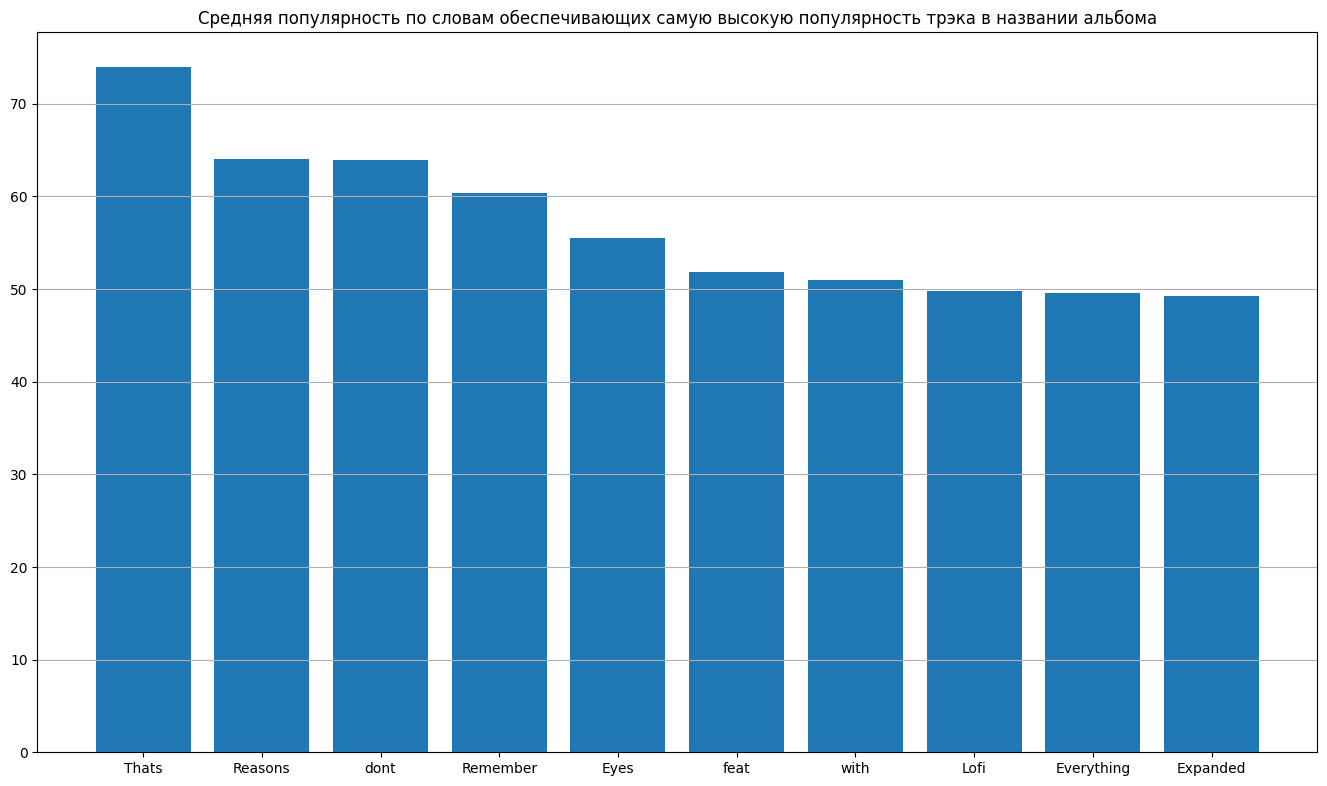

In [75]:
ax = plt.axes([0, 0, 2, 1.5])
ax.bar([x[0] for x in names_and_popularity], [x[1] for x in names_and_popularity])
ax.set_title('Средняя популярность по словам обеспечивающих самую высокую популярность трэка в названии альбома')
ax.grid(axis='y')
plt.show()

> ***ВЫВОД:***
> ***
> Эти 10 слов в названии альбома сигнализирует о высокой популярности трека, можно проверить больше 1000 самых встречающихся, но проверяка всех слов будет не целесообразна.

> ***Проверем поле danceability***

In [76]:
danceabilitys = [[x/20, round(x/20+0.05, 2)] for x in range(0, 20)]
danceabilitys

[[0.0, 0.05],
 [0.05, 0.1],
 [0.1, 0.15],
 [0.15, 0.2],
 [0.2, 0.25],
 [0.25, 0.3],
 [0.3, 0.35],
 [0.35, 0.4],
 [0.4, 0.45],
 [0.45, 0.5],
 [0.5, 0.55],
 [0.55, 0.6],
 [0.6, 0.65],
 [0.65, 0.7],
 [0.7, 0.75],
 [0.75, 0.8],
 [0.8, 0.85],
 [0.85, 0.9],
 [0.9, 0.95],
 [0.95, 1.0]]

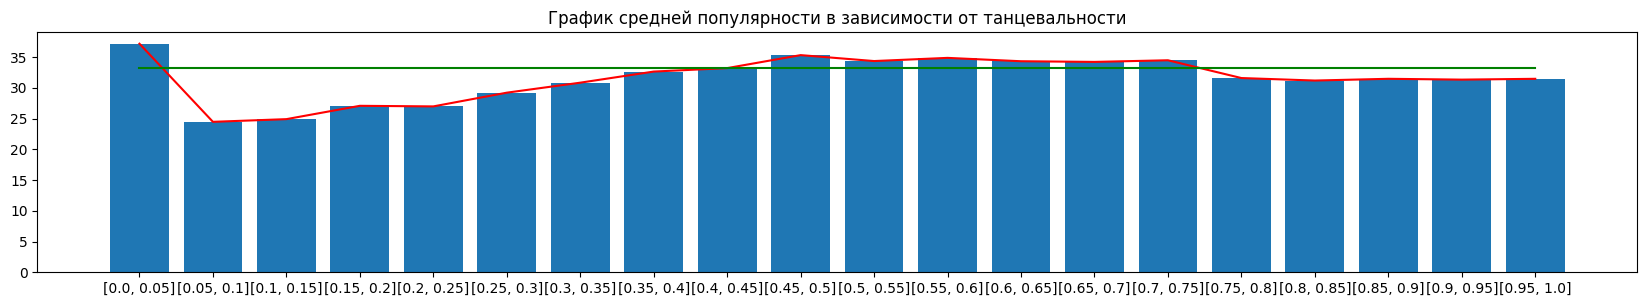

In [77]:
ax = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
for danceability in danceabilitys:
    mean_popularity.append(spotify.loc[(spotify['danceability'] >= danceability[0]) & (spotify['danceability'] < danceability[1]), 'popularity'].mean())
ax.bar([str(x) for x in danceabilitys], mean_popularity)
ax.plot([str(x) for x in danceabilitys], mean_popularity, color='red', label='Популярность')
ax.plot([str(x) for x in danceabilitys], [33.23882665637418]*len(danceabilitys), color='green', label='Средняя популярность')
ax.set_title('График средней популярности в зависимости от танцевальности')
plt.show()

Проверем, сколько песен имеют значение danceability меджду 0 и 0.05, так как там наблюдается скачок популярности, возможно таких песен очень мало и этот скачок не может быть маркером популярности.

In [78]:
spotify.loc[(spotify['danceability'] >= 0) & (spotify['danceability'] < 0.05)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
id,,,,,,,,,,,,,,,,,,,,
4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.0,0.03620,0,-22.519,0,0.0,0.994000,0.940,0.0958,0.0,0.0,0,ambient
4379,4acmzQsAeMJa5sGFSog7fu,Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,The End of Childhood (feat. Jack Liebeck),55,73266,False,0.0,0.04450,0,-26.440,0,0.0,0.972000,0.972,0.0873,0.0,0.0,0,ambient
4664,1Kb2DqjHRvOcT5xeWtz3t5,Sylvain Chauveau,Des Plumes Dans La Tête,Ferme Les Yeux,53,68493,False,0.0,0.03230,2,-23.636,0,0.0,0.994000,0.973,0.0922,0.0,0.0,0,ambient
45670,6B9Mgf9smWqxDjA35VD6MK,Little Symphony,Rialto Beach,Campomoro,22,148711,False,0.0,0.00108,0,-30.204,1,0.0,0.952000,0.991,0.2420,0.0,0.0,0,guitar
45720,7i5OoyPXtSrqz9jobJfG1F,Little Symphony,Rialto Beach,Ritornello,23,102000,False,0.0,0.00129,7,-29.445,1,0.0,0.969000,0.956,0.1230,0.0,0.0,0,guitar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101988,5gEKRH0MCSegG8ZISUPaU2,Granular,The World Of,Tin White Noise,32,182050,False,0.0,0.00002,1,-16.187,1,0.0,0.003850,0.903,0.9210,0.0,0.0,0,sleep
101993,6H0kAiSAFB84jX7dgEDWd6,Rain Sounds,Rain,Rain: Natural Recording,32,84219,False,0.0,0.02540,8,-19.925,1,0.0,0.000002,0.838,0.3390,0.0,0.0,0,sleep
113428,5EYzrykQ95uOmepteDi9KT,El Ruido Blanco;Soñoliento Juan;Mantra para Do...,Aire Acondicionado de Ruido Blanco,Aire de verano,27,128000,False,0.0,0.18800,8,-25.837,0,0.0,0.139000,0.339,0.1220,0.0,0.0,0,world-music


Их 157, что, по-моему мнению достаточно для маркера популярности

> ***ВЫВОД:***
> ***
> danceability влияет на популярность, причём чем меньше, тем меньше популярность, но при наименьшей danceability в пределах 0.05 и 0, популярность возрастает. Запомним это, изучим после проверки всех столбцов.

> ***Проверем поле track_genre***

In [79]:
unique_genres = spotify['track_genre'].unique().tolist()

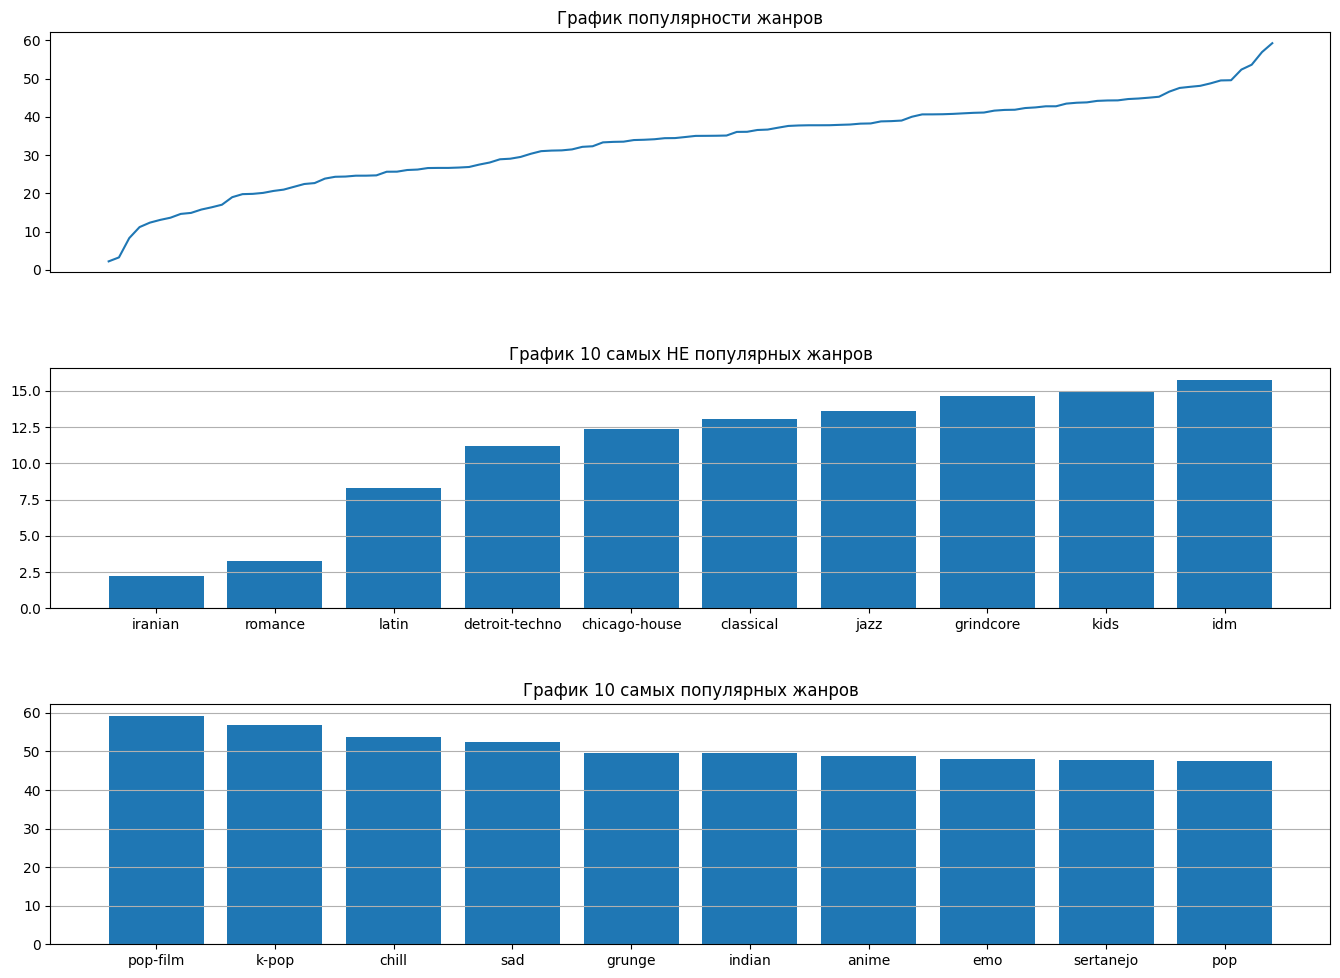

In [80]:
ax = plt.axes([0, 0, 2, 0.5])
ax2 = plt.axes([0, 0.7, 2, 0.5])
ax3 = plt.axes([0, 1.4, 2, 0.5])
mean_popularity = []
for genre in unique_genres:
    mean_popularity.append([genre, spotify.loc[spotify['track_genre'] == genre, 'popularity'].mean()])
mean_popularity=sorted(mean_popularity, key=lambda x: x[1], reverse = True)
ax.bar([x[0] for x in mean_popularity][:10], [x[1] for x in mean_popularity][:10])
ax.set_title('График 10 самых популярных жанров')
mean_popularity=sorted(mean_popularity, key=lambda x: x[1], reverse = False)
ax2.bar([x[0] for x in mean_popularity][:10], [x[1] for x in mean_popularity][:10])
ax2.set_title('График 10 самых НЕ популярных жанров')
ax3.plot([x[0] for x in mean_popularity], [x[1] for x in mean_popularity])
ax3.get_xaxis().set_visible(False)
ax3.set_title('График популярности жанров')
ax.grid(axis='y')
ax2.grid(axis='y')
plt.show()

> ***ВЫВОД:***
> ***
> track_genre влияет на популярность трека, каких-либо неожиданный значений не нашлось, просто есть популярные жанры и не популярные.

> ***Проверем поле time_signature***

In [81]:
unique_signatures = spotify['time_signature'].unique().tolist()
unique_signatures

[4, 3, 1, 5, 0]

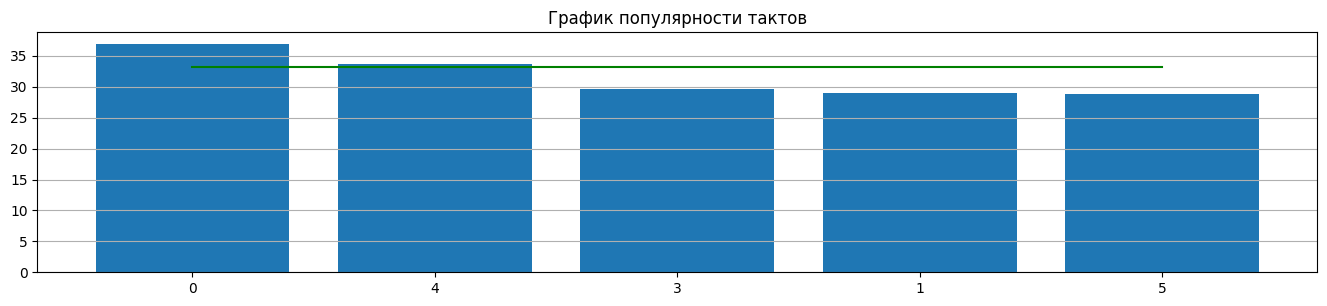

In [82]:
ax = plt.axes([0, 0, 2, 0.5])
mean_popularity = []
for signature in unique_signatures:
    mean_popularity.append([str(signature), spotify.loc[spotify['time_signature'] == signature, 'popularity'].mean()])
mean_popularity=sorted(mean_popularity, key=lambda x: x[1], reverse = True)
ax.bar([x[0] for x in mean_popularity], [x[1] for x in mean_popularity])
ax.plot([x[0] for x in mean_popularity], [33.23882665637418]*len(mean_popularity), color='green', label='Средняя популярность')
ax.set_title('График популярности тактов')
ax.grid(axis='y')
plt.show()

> ***ВЫВОД:***
> ***
> time_signature слабо влияет на популярность, 0 такт имеет немного большую среднюю популярность, 4 такт среднюю популярность, а 3, 1 и 5 немного пониженную.

> ***Проверем поле tempo***

In [83]:
unique_tempo = sorted(spotify['tempo'].unique().tolist())
unique_tempo = [[x, x+10] for x in range(round(min(unique_tempo)), round(max(unique_tempo))+1, 10)]
unique_tempo

[[0, 10],
 [10, 20],
 [20, 30],
 [30, 40],
 [40, 50],
 [50, 60],
 [60, 70],
 [70, 80],
 [80, 90],
 [90, 100],
 [100, 110],
 [110, 120],
 [120, 130],
 [130, 140],
 [140, 150],
 [150, 160],
 [160, 170],
 [170, 180],
 [180, 190],
 [190, 200],
 [200, 210],
 [210, 220],
 [220, 230],
 [230, 240],
 [240, 250]]

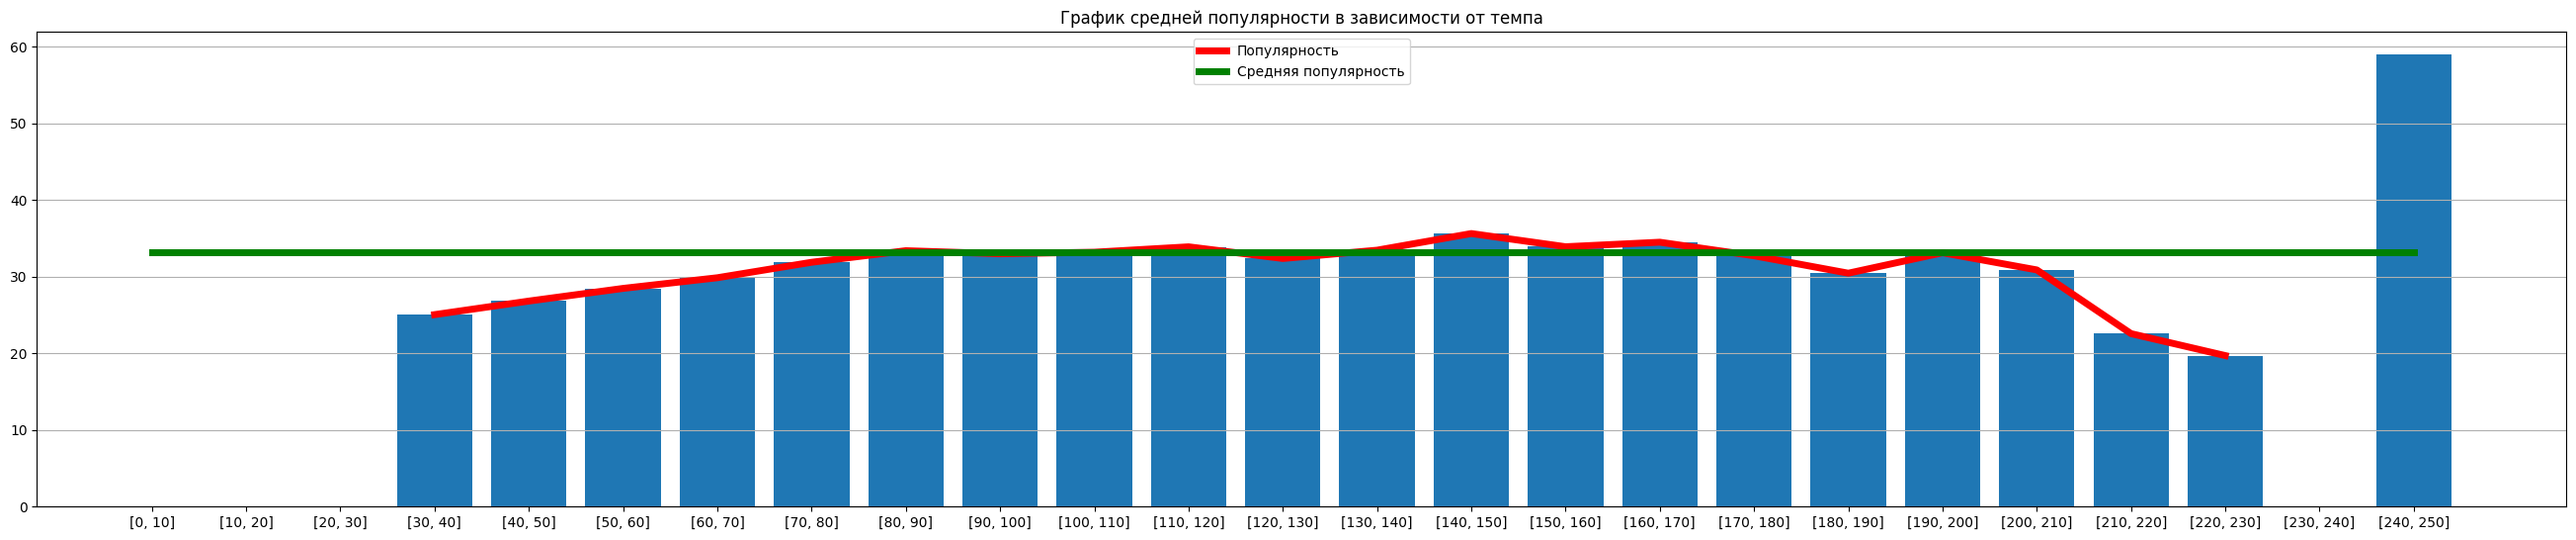

In [84]:
ax = plt.axes([0, 0, 4, 1])
mean_popularity = []
for tempo in unique_tempo:
    mean_popularity.append([tempo, spotify.loc[(spotify['tempo'] > tempo[0]) & (spotify['tempo'] <= tempo[1]), 'popularity'].mean()])
ax.bar([str(x[0]) for x in mean_popularity], [x[1] for x in mean_popularity])
ax.plot([str(x[0]) for x in mean_popularity], [x[1] for x in mean_popularity], label='Популярность', color='red', linewidth=5)
ax.plot([str(x[0]) for x in mean_popularity], [33.23882665637418]*len(mean_popularity), label='Средняя популярность', color='green', linewidth=5)
ax.set_title('График средней популярности в зависимости от темпа')
ax.legend()
ax.grid(axis='y')
plt.show()

Проверим количество треков с темпов в диапазоне от 240 до 250 bpm, так как там слишком высокое значение популярности

In [85]:
spotify.loc[(spotify['tempo'] > 240) & (spotify['tempo'] <= 250)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
id,,,,,,,,,,,,,,,,,,,,
8619,55ROr3cl3yi4YRBgfpDy1d,J.J. Cale,Naturally,Call The Doctor,59,147200,False,0.466,0.188,1,-18.309,0,0.0547,0.198,0.657,0.082,0.615,243.372,3,blues


Она всего одна, значит её можно не учитывать

> ***ВЫВОД:***
> ***
> temp по большей части не влияет на популярность, но треки со слишком низким или высоким значением темпа имеют в среднем меньшую популярность чем остальные

> ***Проверем поле track_name***

In [86]:
ph = [re.split(r'[ \n]', str(x)) for x in spotify['track_name'].tolist()]
all_track_names = []
for i in range(len(ph)):
    for j in range(len(ph[i])):
        phphph=re.sub(r'[\[\]()?!.,:;\'\"\t-]', '', ph[i][j])
        if len(phphph)>3:
            all_track_names.append(phphph)
from collections import Counter
c = Counter(all_track_names)
words = c.most_common(10)
for i in range(len(words)):
    words[i] = list(words[i])[0]
words

['Vivo',
 'Remix',
 'feat',
 'Love',
 'Christmas',
 'Version',
 'From',
 'Live',
 'Remastered',
 'Edit']

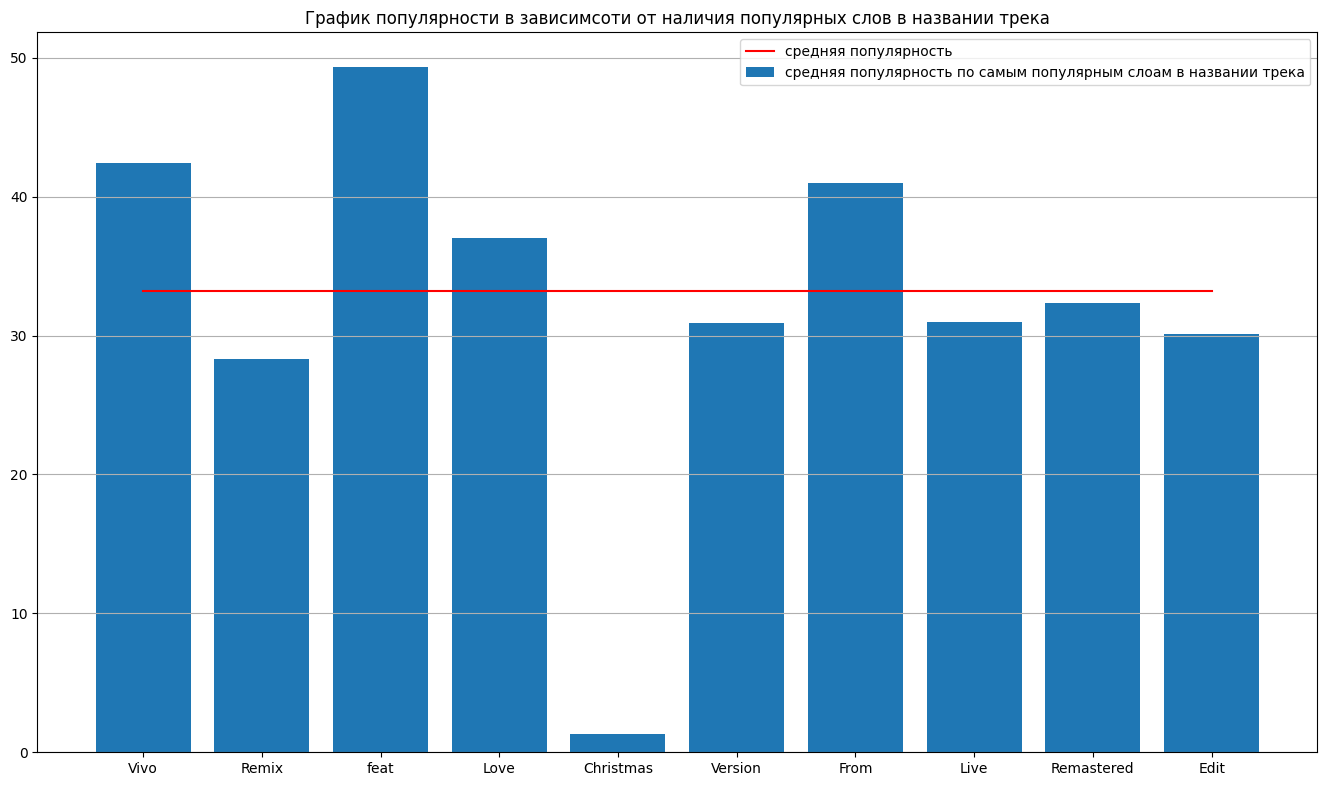

In [87]:
ax = plt.axes([0, 0, 2, 1.5])
popularity_words = []
for word in words:
    popularity_words.append(spotify.loc[spotify['track_name'].str.contains(word), 'popularity'].mean())
ax.bar(words, popularity_words, label='средняя популярность по самым популярным слоам в названии трека')
ax.plot(words, [33.23882665637418]*len(words), color='red', label='средняя популярность')
ax.set_title('График популярности в зависимсоти от наличия популярных слов в названии трека')
ax.grid(axis='y')
ax.legend()
plt.show()

Понятной корреляции с частой встречи слов в названии трека и его популярностью нету,но некоторые слова опредёлнно являются маркерами популярности трека выше среднего, среди 1000 самых популярных слов, найдём наиболее влияющие на популярность.

In [88]:
words = c.most_common(1000)
for i in range(len(words)):
    words[i] = list(words[i])[0]
words

['Vivo',
 'Remix',
 'feat',
 'Love',
 'Christmas',
 'Version',
 'From',
 'Live',
 'Remastered',
 'Edit',
 'Your',
 'with',
 'Original',
 'Dont',
 'Radio',
 'Song',
 'Time',
 'Little',
 'Like',
 'Amor',
 'This',
 'Night',
 'Remaster',
 'Life',
 'What',
 'Baby',
 'Good',
 'Down',
 'Heart',
 'With',
 'World',
 'Last',
 'Home',
 'That',
 'Single',
 'Come',
 'Rain',
 'Never',
 'Dance',
 'Feel',
 'Back',
 'Know',
 'Again',
 'Over',
 'Girl',
 'Piano',
 'When',
 'Black',
 'Rock',
 'Blue',
 'Take',
 'Just',
 'Fire',
 'Will',
 'Você',
 'from',
 'Cant',
 'More',
 'Extended',
 'Acoustic',
 'Only',
 '2022',
 'Dream',
 '2009',
 'Mind',
 'Want',
 'Away',
 'Here',
 'Soundtrack',
 'Light',
 'Youre',
 'Theme',
 'Snow',
 'Dead',
 'Eyes',
 'High',
 'Make',
 'Merry',
 'Stay',
 'Summer',
 'Without',
 'Better',
 'Have',
 'First',
 'Rudolph',
 'Party',
 'Sweet',
 'White',
 'Major',
 'House',
 'Sleep',
 'Long',
 'Days',
 'Forever',
 'Alone',
 'About',
 'Santa',
 'Around',
 'There',
 'Happy',
 'Acústico',
 'Thi

In [89]:
names_and_popularity = [[x, 0] for x in words]
for i in range(len(names_and_popularity)):
    names_and_popularity[i][1] = spotify.loc[spotify['track_name'].str.contains(names_and_popularity[i][0], regex=False), 'popularity'].mean()
names_and_popularity = sorted(names_and_popularity, key=lambda x: x[1], reverse=True)[:10]

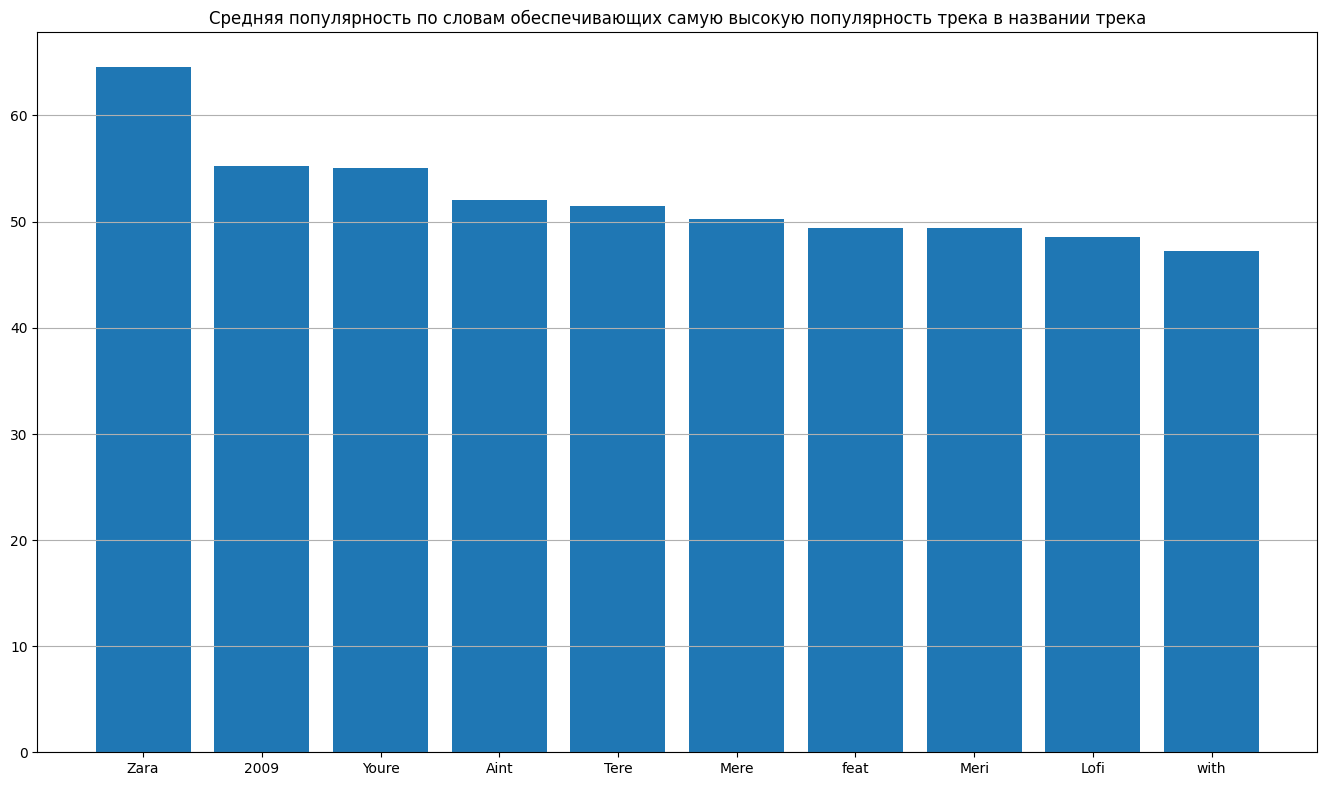

In [90]:
ax = plt.axes([0, 0, 2, 1.5])
ax.bar([x[0] for x in names_and_popularity], [x[1] for x in names_and_popularity])
ax.set_title('Средняя популярность по словам обеспечивающих самую высокую популярность трека в названии трека')
ax.grid(axis='y')
plt.show()

> ***ВЫВОД:***
> ***
> Эти 10 слов в названии трека сигнализирует о высокой популярности трека, можно проверить больше 1000 самых встречающихся, но проверяка всех слов будет не целесообразна.

> ***Проверем поле energy***

In [91]:
energys = [[x/50, round(x/50+0.002, 3)] for x in range(0, 50)]
energys

[[0.0, 0.002],
 [0.02, 0.022],
 [0.04, 0.042],
 [0.06, 0.062],
 [0.08, 0.082],
 [0.1, 0.102],
 [0.12, 0.122],
 [0.14, 0.142],
 [0.16, 0.162],
 [0.18, 0.182],
 [0.2, 0.202],
 [0.22, 0.222],
 [0.24, 0.242],
 [0.26, 0.262],
 [0.28, 0.282],
 [0.3, 0.302],
 [0.32, 0.322],
 [0.34, 0.342],
 [0.36, 0.362],
 [0.38, 0.382],
 [0.4, 0.402],
 [0.42, 0.422],
 [0.44, 0.442],
 [0.46, 0.462],
 [0.48, 0.482],
 [0.5, 0.502],
 [0.52, 0.522],
 [0.54, 0.542],
 [0.56, 0.562],
 [0.58, 0.582],
 [0.6, 0.602],
 [0.62, 0.622],
 [0.64, 0.642],
 [0.66, 0.662],
 [0.68, 0.682],
 [0.7, 0.702],
 [0.72, 0.722],
 [0.74, 0.742],
 [0.76, 0.762],
 [0.78, 0.782],
 [0.8, 0.802],
 [0.82, 0.822],
 [0.84, 0.842],
 [0.86, 0.862],
 [0.88, 0.882],
 [0.9, 0.902],
 [0.92, 0.922],
 [0.94, 0.942],
 [0.96, 0.962],
 [0.98, 0.982]]

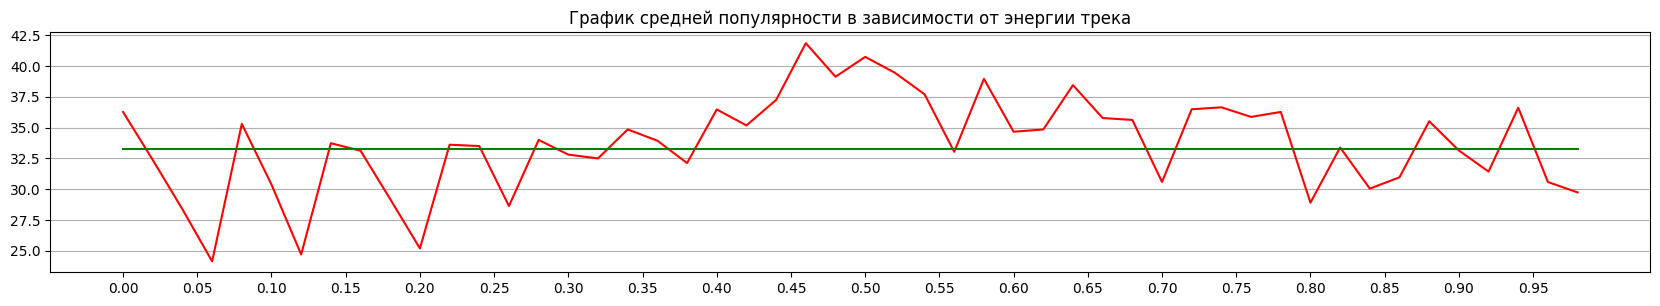

In [92]:
ax = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
for energy in energys:
    mean_popularity.append(spotify.loc[(spotify['energy'] >= energy[0]) & (spotify['energy'] < energy[1]), 'popularity'].mean())
ax.plot([x[0] for x in energys], mean_popularity, color='red', label='Популярность')
ax.plot([x[0] for x in energys], [33.23882665637418]*len(energys), color='green', label='Средняя популярность')
ax.set_xticks([x/20 for x in range(0, 20)])
ax.set_title('График средней популярности в зависимости от энергии трека')
ax.grid(axis='y')
plt.show()

> ***ВЫВОД:***
> ***
> energy не сильно влияет на популярность, значения популярности при разных значений энергии колеблется в пределах 10 от средней популярности по всем трекам, но слишком быстрые и слишком медленные треки в общем менее популярные, чем треки со средним значением energy

> ***Проверим поле key*** 

In [93]:
unique_keys = spotify['key'].unique().tolist()
unique_keys = sorted(unique_keys, key = lambda x: int(x))
unique_keys

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

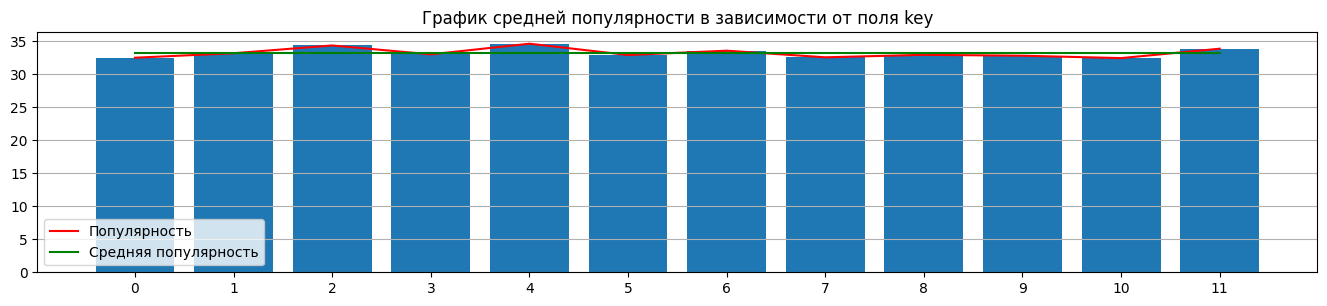

In [94]:
ax = plt.axes([0, 0, 2, 0.5])
mean_popularity = []
for key in unique_keys:
    mean_popularity.append([key, spotify.loc[spotify['key'] == key, 'popularity'].mean()])
ax.bar([x[0] for x in mean_popularity], [x[1] for x in mean_popularity])
ax.plot([x[0] for x in mean_popularity], [x[1] for x in mean_popularity], color='red', label='Популярность')
ax.plot([x[0] for x in mean_popularity], [33.23882665637418]*len([x[0] for x in mean_popularity]), color='green', label='Средняя популярность')
ax.set_title('График средней популярности в зависимости от поля key')
ax.legend()
ax.set_xticks([x for x in range(0, 12)])
ax.grid(axis='y')
plt.show()

> ***ВЫВОД:***
> ***
> Key практически не влияет на популярность, подтверждая значение его корреляции с популярностью

> ***Проверем поле liveness***

In [95]:
unique_liveness1 = [[x/20, round(x/20+0.05, 2)] for x in range(0, 20)]
unique_liveness2 = [[x/25, round(x/25+0.04, 2)] for x in range(0, 25)]
unique_liveness3 = [[x/50, round(x/50+0.02, 2)] for x in range(0, 50)]
unique_liveness4 = [[x/100, round(x/100+0.01, 2)] for x in range(0, 100)]

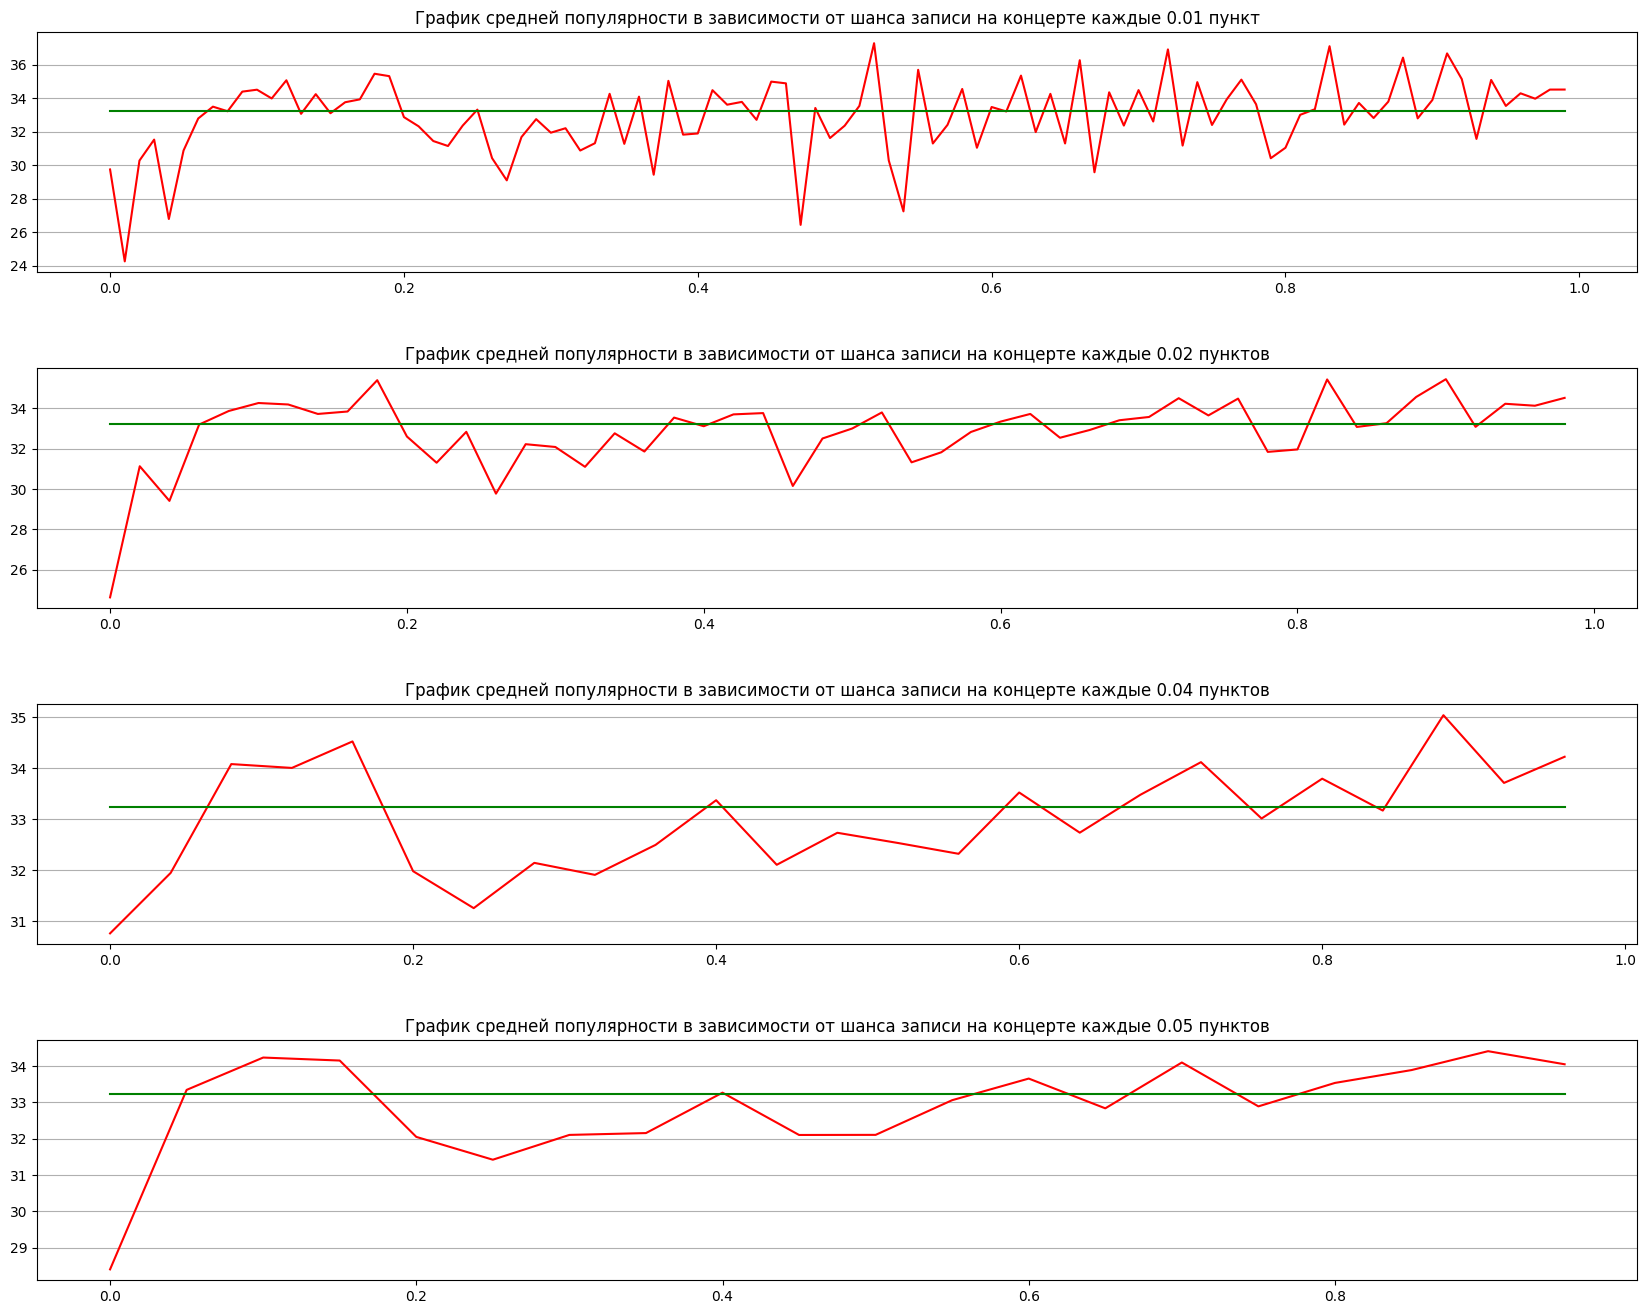

In [96]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
for liveness in unique_liveness1:
    mean_popularity.append(spotify.loc[(spotify['liveness'] >= liveness[0]) & (spotify['liveness'] < liveness[1]), 'popularity'].mean())
ax1.plot([x[0] for x in unique_liveness1], mean_popularity, color='red', label='Популярность')
ax1.plot([x[0] for x in unique_liveness1], [33.23882665637418]*len(unique_liveness1), color='green', label='Средняя популярность')
ax1.set_title('График средней популярности в зависимости от шанса записи на концерте каждые 0.05 пунктов')
ax1.grid(axis='y')

ax2 = plt.axes([0, 0.7, 2.5, 0.5])
mean_popularity = []
for liveness in unique_liveness2:
    mean_popularity.append(spotify.loc[(spotify['liveness'] >= liveness[0]) & (spotify['liveness'] < liveness[1]), 'popularity'].mean())
ax2.plot([x[0] for x in unique_liveness2], mean_popularity, color='red', label='Популярность')
ax2.plot([x[0] for x in unique_liveness2], [33.23882665637418]*len(unique_liveness2), color='green', label='Средняя популярность')
ax2.set_title('График средней популярности в зависимости от шанса записи на концерте каждые 0.04 пунктов')
ax2.grid(axis='y')

ax3 = plt.axes([0, 1.4, 2.5, 0.5])
mean_popularity = []
for liveness in unique_liveness3:
    mean_popularity.append(spotify.loc[(spotify['liveness'] >= liveness[0]) & (spotify['liveness'] < liveness[1]), 'popularity'].mean())
ax3.plot([x[0] for x in unique_liveness3], mean_popularity, color='red', label='Популярность')
ax3.plot([x[0] for x in unique_liveness3], [33.23882665637418]*len(unique_liveness3), color='green', label='Средняя популярность')
ax3.set_title('График средней популярности в зависимости от шанса записи на концерте каждые 0.02 пунктов')
ax3.grid(axis='y')

ax4 = plt.axes([0, 2.1, 2.5, 0.5])
mean_popularity = []
for liveness in unique_liveness4:
    mean_popularity.append(spotify.loc[(spotify['liveness'] >= liveness[0]) & (spotify['liveness'] < liveness[1]), 'popularity'].mean())
ax4.plot([x[0] for x in unique_liveness4], mean_popularity, color='red', label='Популярность')
ax4.plot([x[0] for x in unique_liveness4], [33.23882665637418]*len(unique_liveness4), color='green', label='Средняя популярность')
ax4.set_title('График средней популярности в зависимости от шанса записи на концерте каждые 0.01 пункт')
ax4.grid(axis='y')

plt.show()

> ***ВЫВОД:***
> ***
> liveness практически не влияет на популярность, подтверждая значение его корреляции с популярностью

> ***Проверим поле duration_ms***

In [97]:
unique_duration_ms = sorted(spotify['duration_ms'].unique().tolist())
unique_duration_ms = [[x, x+5000] for x in range(min(unique_duration_ms), max(unique_duration_ms)+1, 5000)]
unique_duration_ms

[[8586, 13586],
 [13586, 18586],
 [18586, 23586],
 [23586, 28586],
 [28586, 33586],
 [33586, 38586],
 [38586, 43586],
 [43586, 48586],
 [48586, 53586],
 [53586, 58586],
 [58586, 63586],
 [63586, 68586],
 [68586, 73586],
 [73586, 78586],
 [78586, 83586],
 [83586, 88586],
 [88586, 93586],
 [93586, 98586],
 [98586, 103586],
 [103586, 108586],
 [108586, 113586],
 [113586, 118586],
 [118586, 123586],
 [123586, 128586],
 [128586, 133586],
 [133586, 138586],
 [138586, 143586],
 [143586, 148586],
 [148586, 153586],
 [153586, 158586],
 [158586, 163586],
 [163586, 168586],
 [168586, 173586],
 [173586, 178586],
 [178586, 183586],
 [183586, 188586],
 [188586, 193586],
 [193586, 198586],
 [198586, 203586],
 [203586, 208586],
 [208586, 213586],
 [213586, 218586],
 [218586, 223586],
 [223586, 228586],
 [228586, 233586],
 [233586, 238586],
 [238586, 243586],
 [243586, 248586],
 [248586, 253586],
 [253586, 258586],
 [258586, 263586],
 [263586, 268586],
 [268586, 273586],
 [273586, 278586],
 [278586, 28

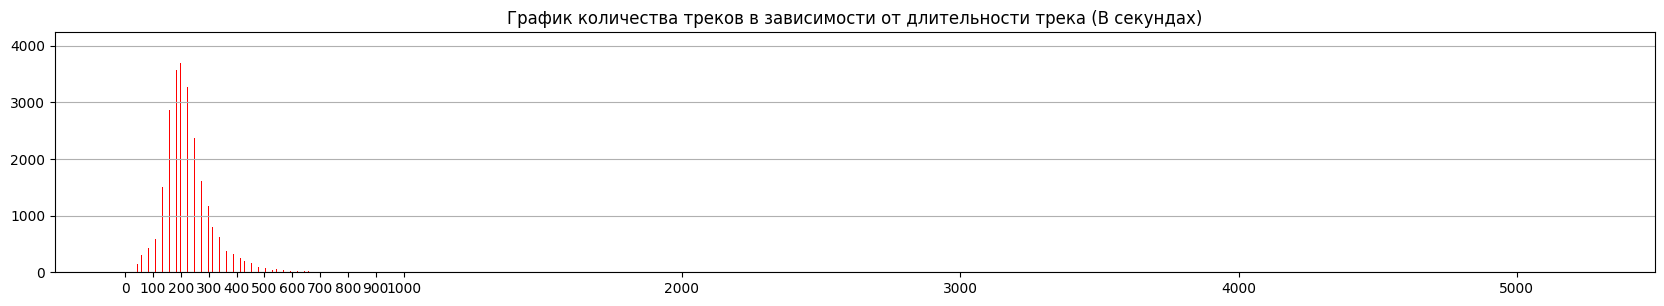

In [98]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
for duration_ms in unique_duration_ms:
    mean_popularity.append(spotify.loc[(round(spotify['duration_ms']/1000) >= round(duration_ms[0]/1000)) & (round(spotify['duration_ms']/1000) < round(duration_ms[1]/1000)), 'popularity'].count())
ax1.bar([round(x[0]/1000) for x in unique_duration_ms], mean_popularity, color='red', label='Популярность')
ax1.set_title('График количества треков в зависимости от длительности трека (В секундах)')
ax1.set_xticks([x for x in range(0, 1100, 100)] + [x for x in range(2000, 6000, 1000)])
ax1.grid(axis='y')

Видим, что длительность большинства треков в диапазоне от 0 до 700 секунд. Рассмотрим этот диапазон длительности треков.

In [99]:
unique_duration_ms1 = [[x, x+1000] for x in range(0, 700000, 1000)]
unique_duration_ms2 = [[x, x+2000] for x in range(0, 700000, 2000)]
unique_duration_ms3 = [[x, x+5000] for x in range(0, 700000, 5000)]
unique_duration_ms4 = [[x, x+10000] for x in range(0, 700000, 10000)]

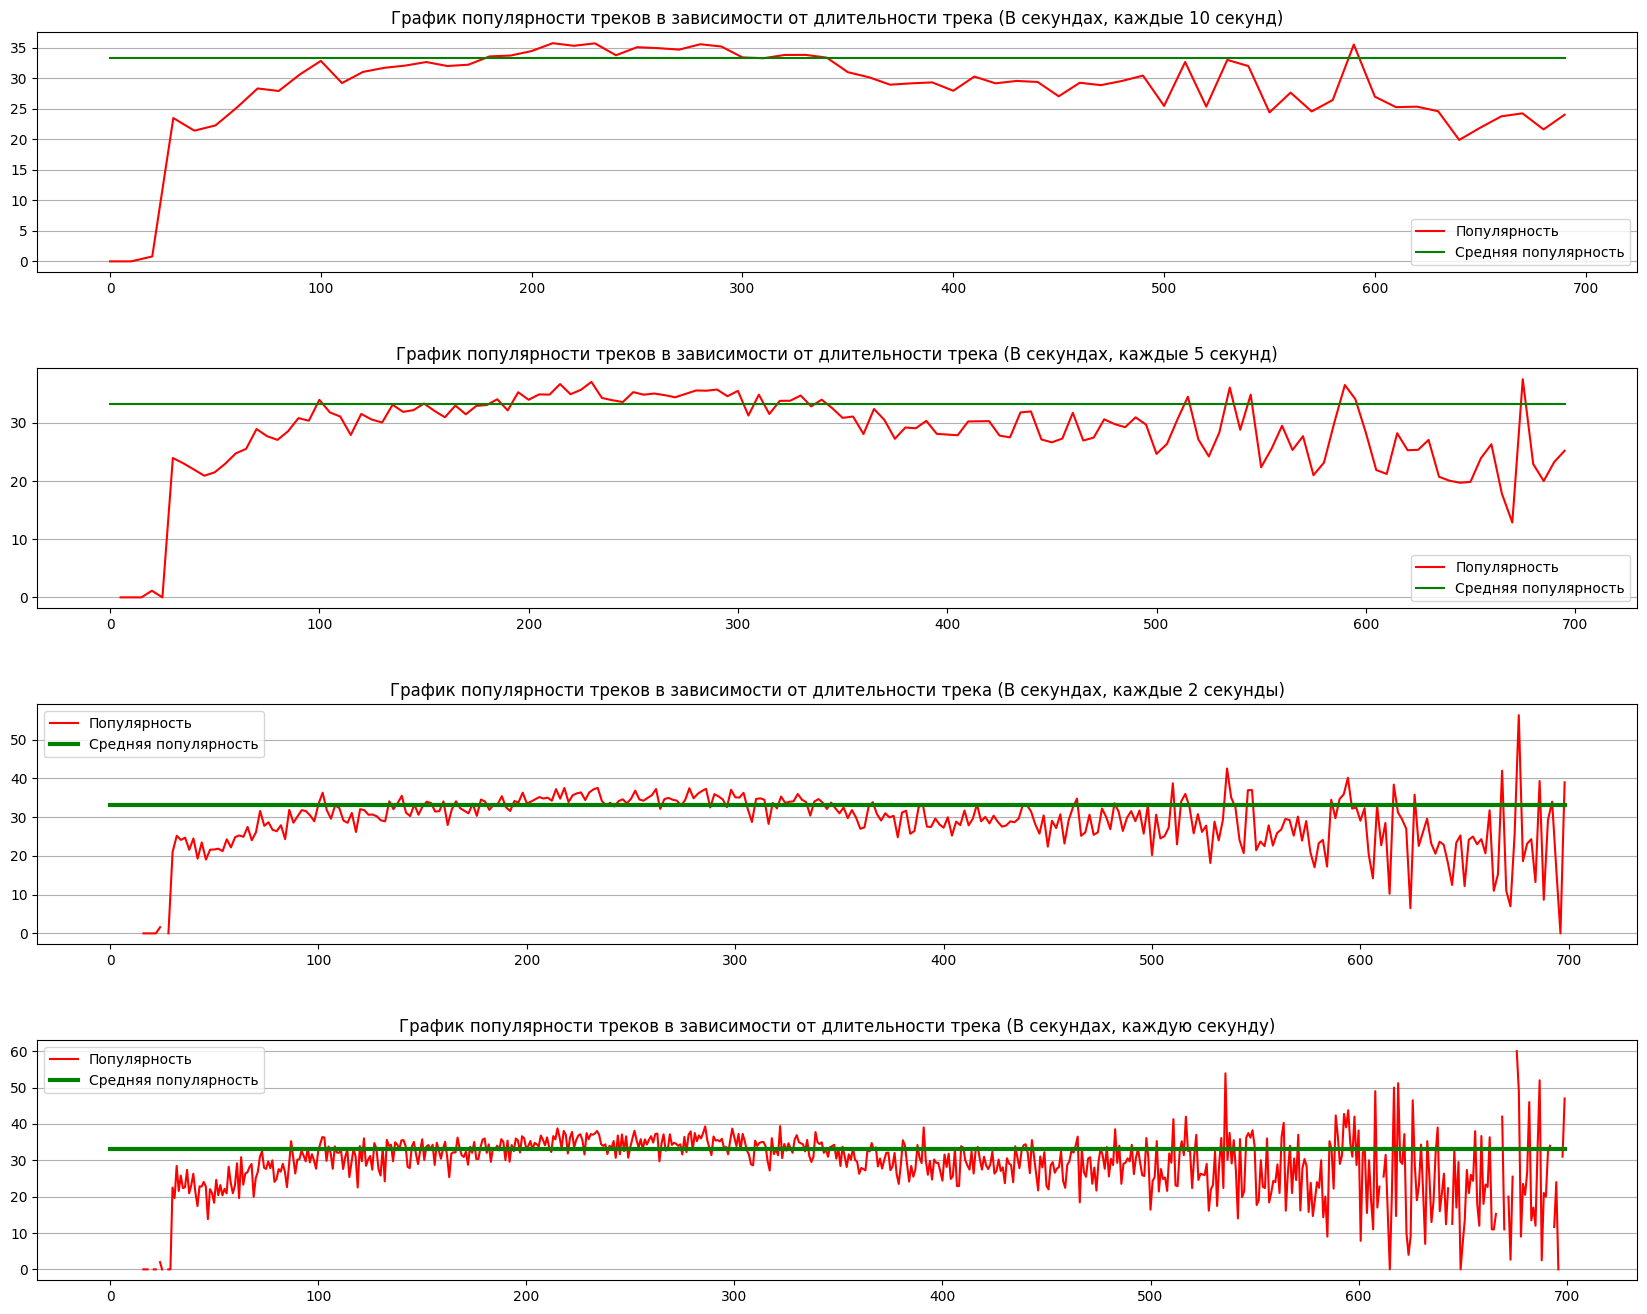

In [100]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
for duration_ms in unique_duration_ms1:
    mean_popularity.append(spotify.loc[(round(spotify['duration_ms']/1000) >= round(duration_ms[0]/1000)) & (round(spotify['duration_ms']/1000) < round(duration_ms[1]/1000)), 'popularity'].mean())
ax1.plot([round(x[0]/1000) for x in unique_duration_ms1], mean_popularity, color='red', label='Популярность')
ax1.plot([round(x[0]/1000) for x in unique_duration_ms1], [33.23882665637418]*len(unique_duration_ms1), color='green', label='Средняя популярность', linewidth=3)
ax1.set_title('График популярности треков в зависимости от длительности трека (В секундах, каждую секунду)')
ax1.grid(axis='y')

ax2 = plt.axes([0, 0.7, 2.5, 0.5])
mean_popularity = []
for duration_ms in unique_duration_ms2:
    mean_popularity.append(spotify.loc[(round(spotify['duration_ms']/1000) >= round(duration_ms[0]/1000)) & (round(spotify['duration_ms']/1000) < round(duration_ms[1]/1000)), 'popularity'].mean())
ax2.plot([round(x[0]/1000) for x in unique_duration_ms2], mean_popularity, color='red', label='Популярность')
ax2.plot([round(x[0]/1000) for x in unique_duration_ms2], [33.23882665637418]*len(unique_duration_ms2), color='green', label='Средняя популярность', linewidth=3)
ax2.set_title('График популярности треков в зависимости от длительности трека (В секундах, каждые 2 секунды)')
ax2.grid(axis='y')

ax3 = plt.axes([0, 1.4, 2.5, 0.5])
mean_popularity = []
for duration_ms in unique_duration_ms3:
    mean_popularity.append(spotify.loc[(round(spotify['duration_ms']/1000) >= round(duration_ms[0]/1000)) & (round(spotify['duration_ms']/1000) < round(duration_ms[1]/1000)), 'popularity'].mean())
ax3.plot([round(x[0]/1000) for x in unique_duration_ms3], mean_popularity, color='red', label='Популярность')
ax3.plot([round(x[0]/1000) for x in unique_duration_ms3], [33.23882665637418]*len(unique_duration_ms3), color='green', label='Средняя популярность')
ax3.set_title('График популярности треков в зависимости от длительности трека (В секундах, каждые 5 секунд)')
ax3.grid(axis='y')

ax4 = plt.axes([0, 2.1, 2.5, 0.5])
mean_popularity = []
for duration_ms in unique_duration_ms4:
    mean_popularity.append(spotify.loc[(round(spotify['duration_ms']/1000) >= round(duration_ms[0]/1000)) & (round(spotify['duration_ms']/1000) < round(duration_ms[1]/1000)), 'popularity'].mean())
ax4.plot([round(x[0]/1000) for x in unique_duration_ms4], mean_popularity, color='red', label='Популярность')
ax4.plot([round(x[0]/1000) for x in unique_duration_ms4], [33.23882665637418]*len(unique_duration_ms4), color='green', label='Средняя популярность')
ax4.set_title('График популярности треков в зависимости от длительности трека (В секундах, каждые 10 секунд)')
ax4.grid(axis='y')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

> ***ВЫВОД:***
> ***
> Из первого графика, мы выяснили, что большая часть треков дляться от 100 до 400 секунд, и именно в этом диапазоне средняя популярность треков близка к средней, но чем меньше треков с какой-либо длительностью, тем более "нестабильнее" и меньше становиться их средняя популярность.

> ***Проверим поле mode***

In [101]:
unique_modes = spotify['mode'].unique().tolist()
unique_modes = sorted(unique_modes, key = lambda x: int(x))
unique_modes

[0, 1]

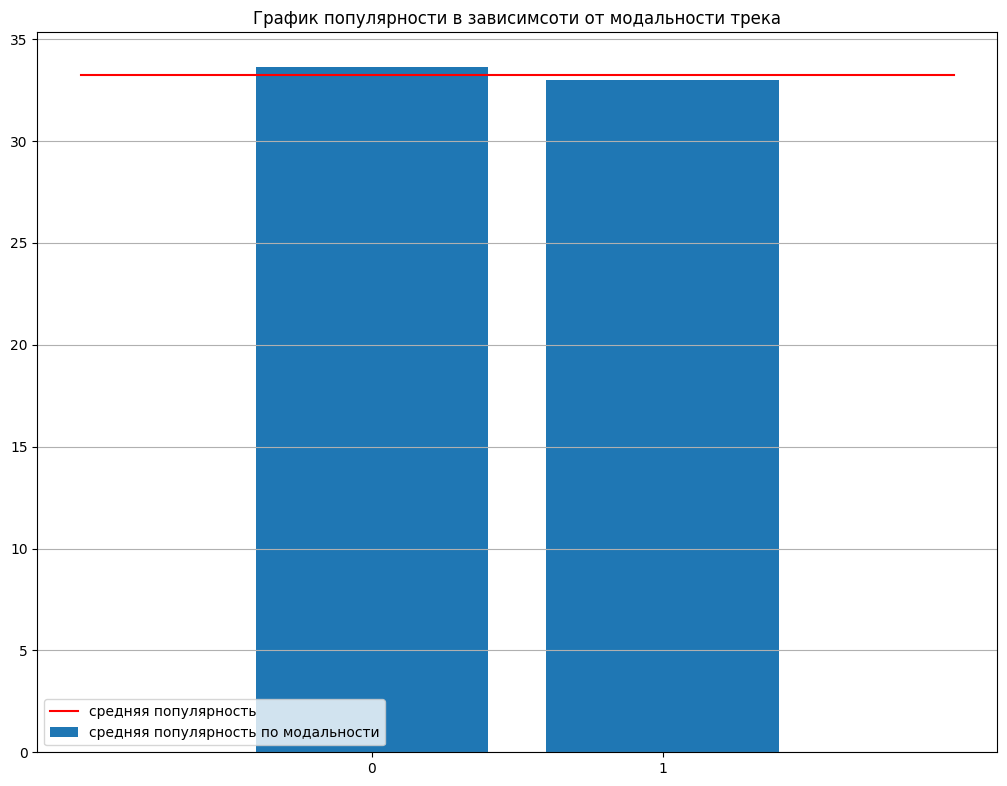

In [102]:
ax = plt.axes([0, 0, 1.5, 1.5])
ax.bar(unique_modes, [spotify.loc[spotify['mode'] == 0, 'popularity'].mean(), spotify.loc[spotify['mode'] == 1, 'popularity'].mean()], label='средняя популярность по модальности')
ax.plot([-1, 0, 1, 2], [33.23882665637418]*4, color='red', label='средняя популярность')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 2, 1)])
ax.set_title('График популярности в зависимсоти от модальности трека')
ax.grid(axis='y')
ax.legend()
plt.show()

> ***ВЫВОД:***
> ***
> mode практически не влияет на популярность

> ***Проверим поле acousticness***

In [103]:
unique_acousticness1 = [[x/20, round(x/20+0.05, 2)] for x in range(0, 20)]
unique_acousticness2 = [[x/25, round(x/25+0.04, 2)] for x in range(0, 25)]
unique_acousticness3 = [[x/50, round(x/50+0.02, 2)] for x in range(0, 50)]
unique_acousticness4 = [[x/100, round(x/100+0.01, 2)] for x in range(0, 100)]

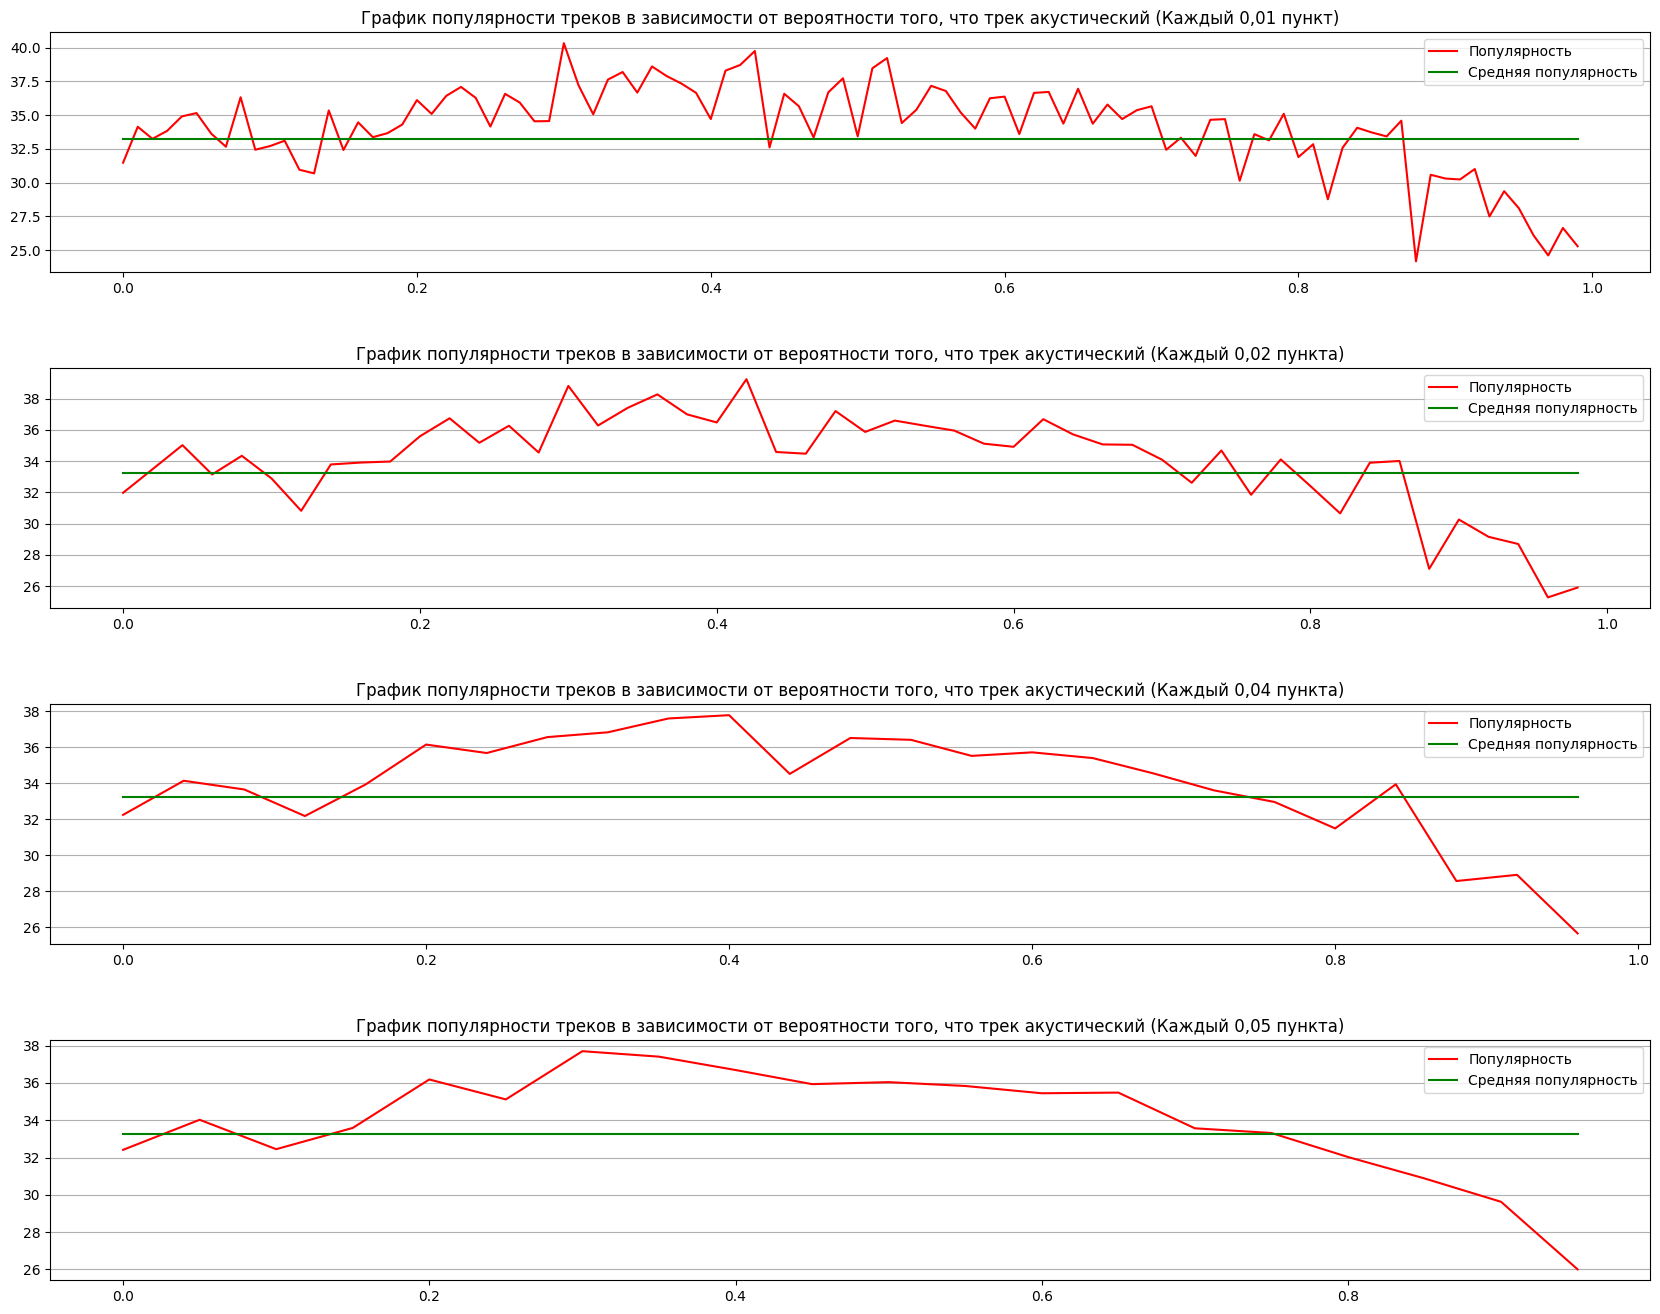

In [104]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
for acousticness in unique_acousticness1:
    mean_popularity.append(spotify.loc[(spotify['acousticness'] >= acousticness[0]) & (spotify['acousticness'] < acousticness[1]), 'popularity'].mean())
ax1.plot([x[0] for x in unique_acousticness1], mean_popularity, color='red', label='Популярность')
ax1.plot([x[0] for x in unique_acousticness1], [33.23882665637418]*len(unique_acousticness1), color='green', label='Средняя популярность')
ax1.set_title('График популярности треков в зависимости от вероятности того, что трек акустический (Каждый 0,05 пункта)')
ax1.grid(axis='y')

ax2 = plt.axes([0, 0.7, 2.5, 0.5])
mean_popularity = []
for acousticness in unique_acousticness2:
    mean_popularity.append(spotify.loc[(spotify['acousticness'] >= acousticness[0]) & (spotify['acousticness'] < acousticness[1]), 'popularity'].mean())
ax2.plot([x[0] for x in unique_acousticness2], mean_popularity, color='red', label='Популярность')
ax2.plot([x[0] for x in unique_acousticness2], [33.23882665637418]*len(unique_acousticness2), color='green', label='Средняя популярность')
ax2.set_title('График популярности треков в зависимости от вероятности того, что трек акустический (Каждый 0,04 пункта)')
ax2.grid(axis='y')

ax3 = plt.axes([0, 1.4, 2.5, 0.5])
mean_popularity = []
for acousticness in unique_acousticness3:
    mean_popularity.append(spotify.loc[(spotify['acousticness'] >= acousticness[0]) & (spotify['acousticness'] < acousticness[1]), 'popularity'].mean())
ax3.plot([x[0] for x in unique_acousticness3], mean_popularity, color='red', label='Популярность')
ax3.plot([x[0] for x in unique_acousticness3], [33.23882665637418]*len(unique_acousticness3), color='green', label='Средняя популярность')
ax3.set_title('График популярности треков в зависимости от вероятности того, что трек акустический (Каждый 0,02 пункта)')
ax3.grid(axis='y')

ax4 = plt.axes([0, 2.1, 2.5, 0.5])
mean_popularity = []
for acousticness in unique_acousticness4:
    mean_popularity.append(spotify.loc[(spotify['acousticness'] >= acousticness[0]) & (spotify['acousticness'] < acousticness[1]), 'popularity'].mean())
ax4.plot([x[0] for x in unique_acousticness4], mean_popularity, color='red', label='Популярность')
ax4.plot([x[0] for x in unique_acousticness4], [33.23882665637418]*len(unique_acousticness4), color='green', label='Средняя популярность')
ax4.set_title('График популярности треков в зависимости от вероятности того, что трек акустический (Каждый 0,01 пункт)')
ax4.grid(axis='y')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

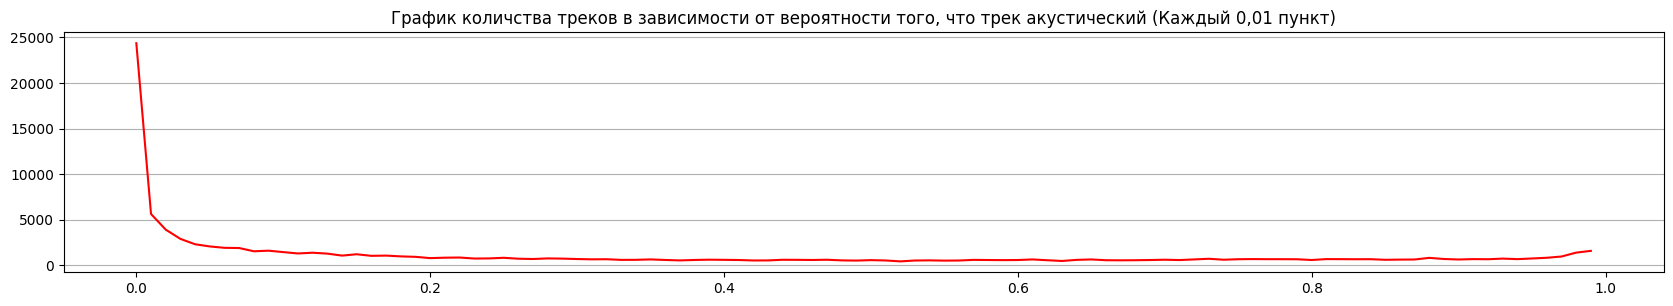

In [105]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
for acousticness in unique_acousticness4:
    mean_popularity.append(spotify.loc[(spotify['acousticness'] >= acousticness[0]) & (spotify['acousticness'] < acousticness[1]), 'popularity'].count())
ax1.plot([x[0] for x in unique_acousticness4], mean_popularity, color='red', label='Количество')
ax1.set_title('График количства треков в зависимости от вероятности того, что трек акустический (Каждый 0,01 пункт)')
ax1.grid(axis='y')

> ***ВЫВОД:***
> ***
> acousticness слабо влияет на популярность, лишь практически стопроцентно акустические треки имеют заметно меньшую среднюю популярность. Треки со среднем значение acousticness скорее всего используют акустические инструмент, но не только их, такие треки имеют чуть большую среднюю популярность, а совсем не акустические треки имеют среднюю популярность (+- 1 пункт популярности), потому что большинство треков совсем не акустические.

> ***Проверим поле valence***

In [106]:
name = 'valence'
id = 1
for i in [20, 25, 50, 100]:
    exec(f"unique_{name}{str(id)} = [[x/{i}, round(x/{i}+{1/i}, 2)] for x in range(0, {i})]")
    id+=1

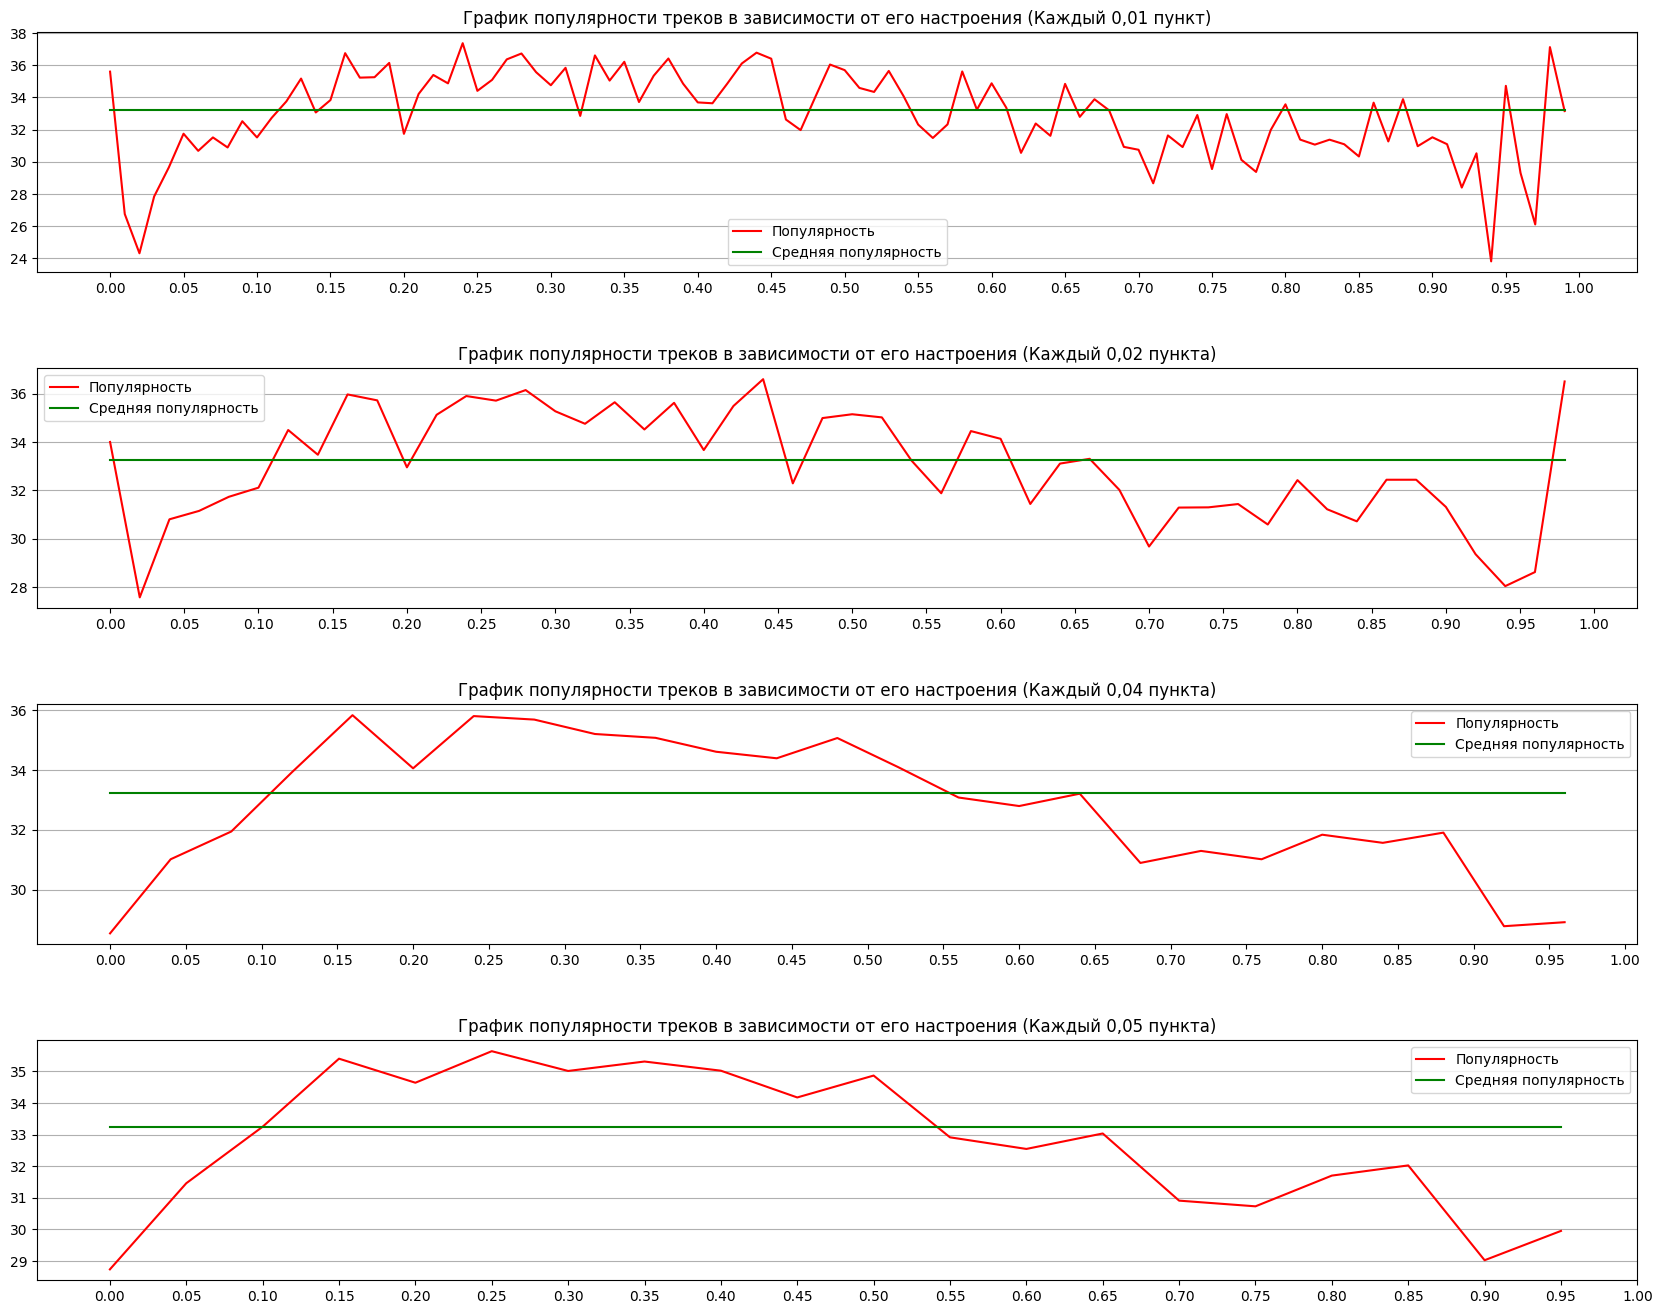

In [107]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'valence'
uniques = unique_valence1
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax1.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax1.set_title('График популярности треков в зависимости от его настроения (Каждый 0,05 пункта)')
ax1.grid(axis='y')
uniques = unique_valence2
ax2 = plt.axes([0, 0.7, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax2.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax2.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax2.set_title('График популярности треков в зависимости от его настроения (Каждый 0,04 пункта)')
ax2.grid(axis='y')
uniques = unique_valence3
ax3 = plt.axes([0, 1.4, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax3.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax3.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax3.set_title('График популярности треков в зависимости от его настроения (Каждый 0,02 пункта)')
ax3.grid(axis='y')
uniques = unique_valence4
ax4 = plt.axes([0, 2.1, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax4.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax4.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax4.set_title('График популярности треков в зависимости от его настроения (Каждый 0,01 пункт)')
ax4.grid(axis='y')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

x_range = [x/20 for x in range(0, 21)]
ax1.set_xticks(x_range)
ax2.set_xticks(x_range)
ax3.set_xticks(x_range)
ax4.set_xticks(x_range)

plt.show()

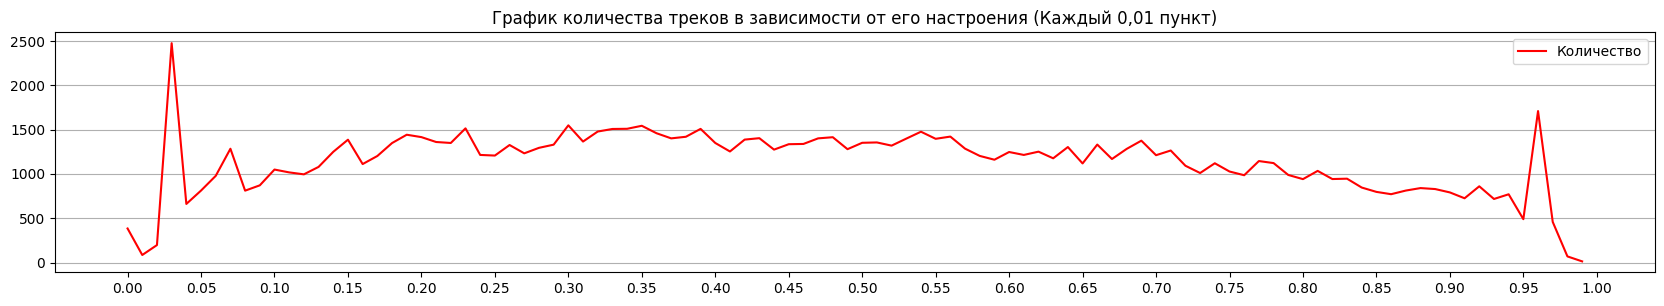

In [108]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'valence'
uniques = unique_valence4
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].count())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Количество')
ax1.set_title('График количества треков в зависимости от его настроения (Каждый 0,01 пункт)')
ax1.set_xticks([x/20 for x in range(0, 21)])
ax1.legend()
ax1.grid(axis='y')

> ***ВЫВОД:***
> ***
> valence слабо влияет на популярность, но стоит отметить, что скорее негативные треки в среднем чуть более популярны, чем скорее позитивные треки. Так же стоит отметить, что наблюдаются скачки количества треков у крайних значений valence, то есть все-таки стараються создавать треки с определённой направленностью.

> ***Проверим поле speechiness***

In [109]:
name = 'speechiness'
id = 1
for i in [20, 25, 50, 100]:
    exec(f"unique_{name}{str(id)} = [[x/{i}, round(x/{i}+{1/i}, 2)] for x in range(0, {i})]")
    id+=1

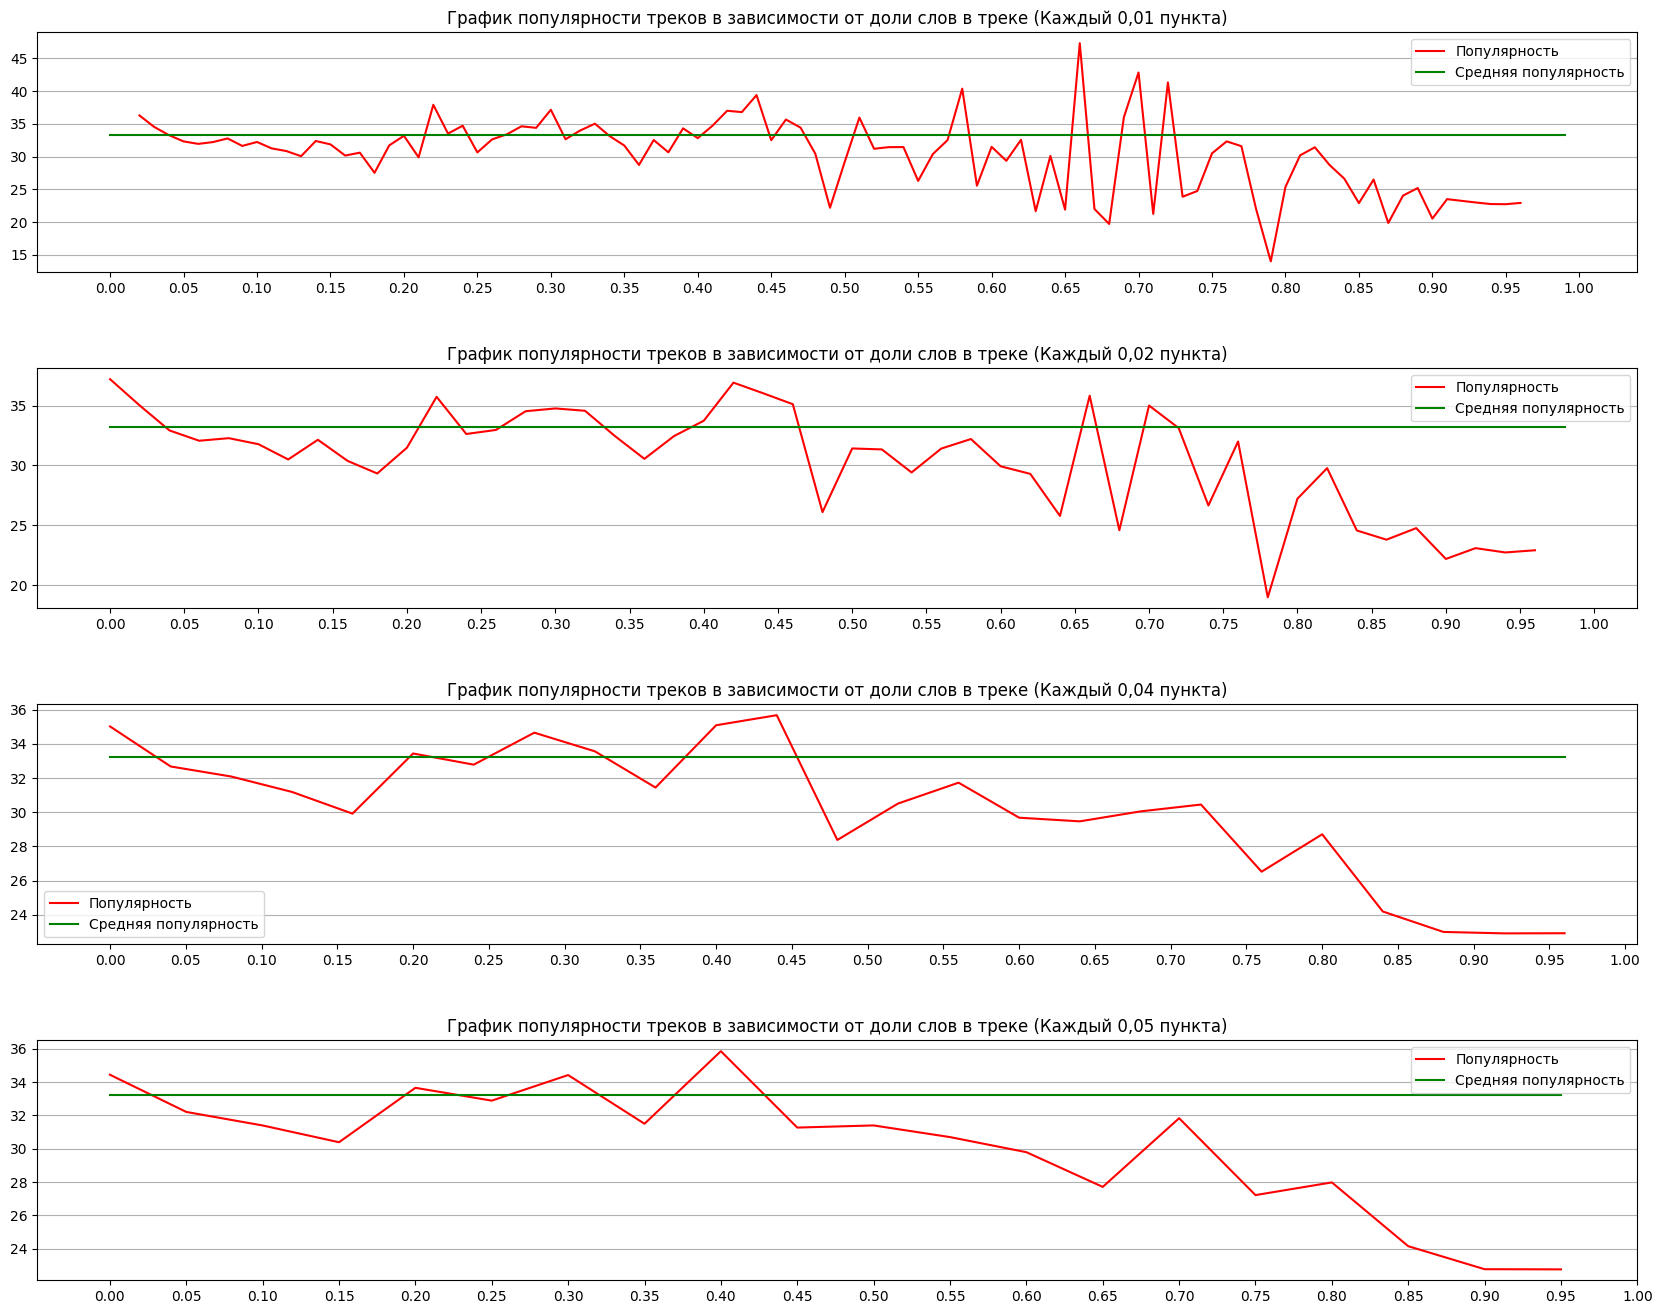

In [110]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'speechiness'
uniques = unique_valence1
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax1.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax1.set_title('График популярности треков в зависимости от доли слов в треке (Каждый 0,05 пункта)')
ax1.grid(axis='y')
uniques = unique_valence2
ax2 = plt.axes([0, 0.7, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax2.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax2.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax2.set_title('График популярности треков в зависимости от доли слов в треке (Каждый 0,04 пункта)')
ax2.grid(axis='y')
uniques = unique_valence3
ax3 = plt.axes([0, 1.4, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax3.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax3.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax3.set_title('График популярности треков в зависимости от доли слов в треке (Каждый 0,02 пункта)')
ax3.grid(axis='y')
uniques = unique_valence4
ax4 = plt.axes([0, 2.1, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax4.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax4.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax4.set_title('График популярности треков в зависимости от доли слов в треке (Каждый 0,01 пункта)')
ax4.grid(axis='y')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

x_range = [x/20 for x in range(0, 21)]
ax1.set_xticks(x_range)
ax2.set_xticks(x_range)
ax3.set_xticks(x_range)
ax4.set_xticks(x_range)

plt.show()

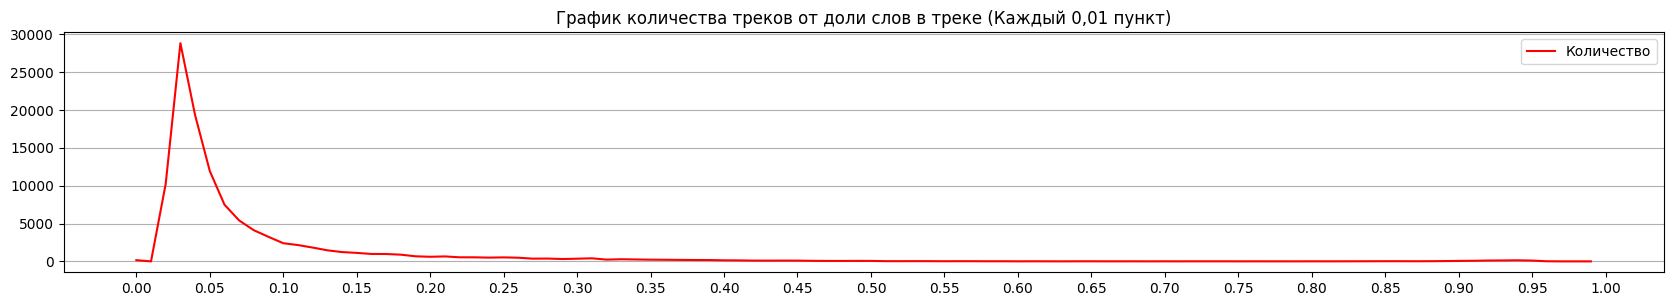

In [111]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'speechiness'
uniques = unique_valence4
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].count())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Количество')
ax1.set_title('График количества треков от доли слов в треке (Каждый 0,01 пункт)')
ax1.set_xticks([x/20 for x in range(0, 21)])
ax1.legend()
ax1.grid(axis='y')

> ***ВЫВОД:***
> ***
> speechiness слабо влияет на популярность, но треки польностью состоящие из мелодии или слов в среднем менее популярны, чем треки состоящие и из мелодии, и из слов. Большинство треков имеет значение speechiness в районе 0.05 пунктов, и именно там популярность наиболее приближена к средней.

> ***Проверим поле instrumentalness***

In [112]:
name = 'instrumentalness'
id = 1
for i in [20, 25, 50, 100]:
    exec(f"unique_{name}{str(id)} = [[x/{i}, round(x/{i}+{1/i}, 2)] for x in range(0, {i})]")
    id+=1

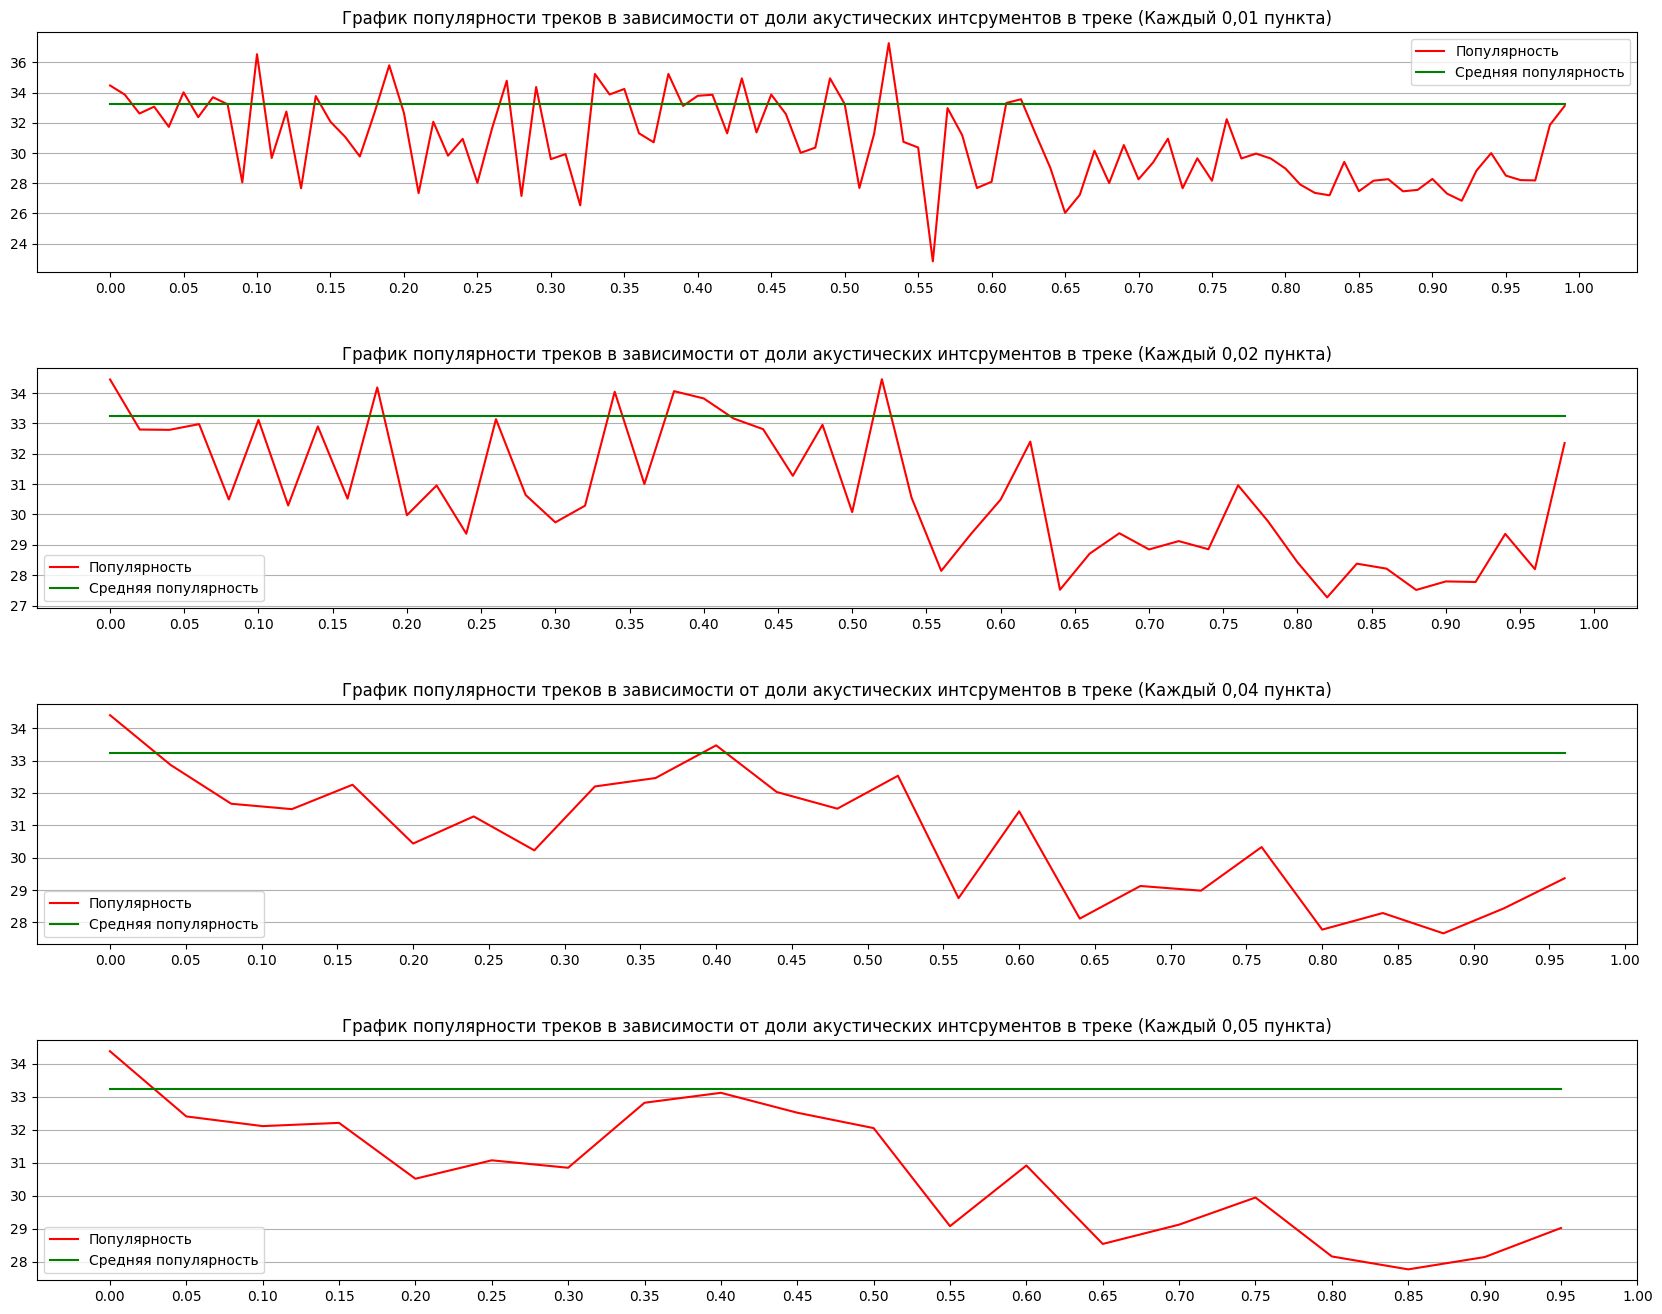

In [113]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'instrumentalness'
uniques = unique_valence1
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax1.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax1.set_title('График популярности треков в зависимости от доли акустических интсрументов в треке (Каждый 0,05 пункта)')
ax1.grid(axis='y')
uniques = unique_valence2
ax2 = plt.axes([0, 0.7, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax2.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax2.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax2.set_title('График популярности треков в зависимости от доли акустических интсрументов в треке (Каждый 0,04 пункта)')
ax2.grid(axis='y')
uniques = unique_valence3
ax3 = plt.axes([0, 1.4, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax3.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax3.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax3.set_title('График популярности треков в зависимости от доли акустических интсрументов в треке (Каждый 0,02 пункта)')
ax3.grid(axis='y')
uniques = unique_valence4
ax4 = plt.axes([0, 2.1, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax4.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax4.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax4.set_title('График популярности треков в зависимости от доли акустических интсрументов в треке (Каждый 0,01 пункта)')
ax4.grid(axis='y')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

x_range = [x/20 for x in range(0, 21)]
ax1.set_xticks(x_range)
ax2.set_xticks(x_range)
ax3.set_xticks(x_range)
ax4.set_xticks(x_range)

plt.show()

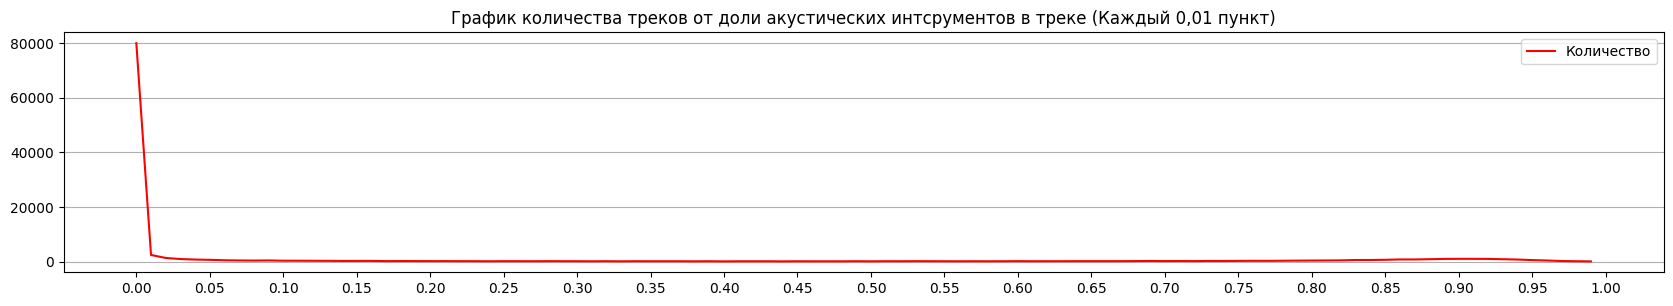

In [114]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'instrumentalness'
uniques = unique_valence4
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].count())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Количество')
ax1.set_title('График количества треков от доли акустических интсрументов в треке (Каждый 0,01 пункт)')
ax1.set_xticks([x/20 for x in range(0, 21)])
ax1.legend()
ax1.grid(axis='y')

> ***ВЫВОД:***
> ***
> instrumentalness слабо влияет на популярность, но треки польностью состоящие акустических инструментов чуть менее популярны, чем остальные. Большинство треков имеет значение instrumentalness в районе 0.01 пункта, и именно там популярность наиболее приближена к средней.

Проверим некоторые, смежные гипотезы, основанные на нескольких столбцах

> ***ГИПОТЕЗА: Треки с низкой валентностью (злые), высокой энергией и содержащие ненормативную лекиску, более популярны чем те же треки, но без ненормативной лексики***

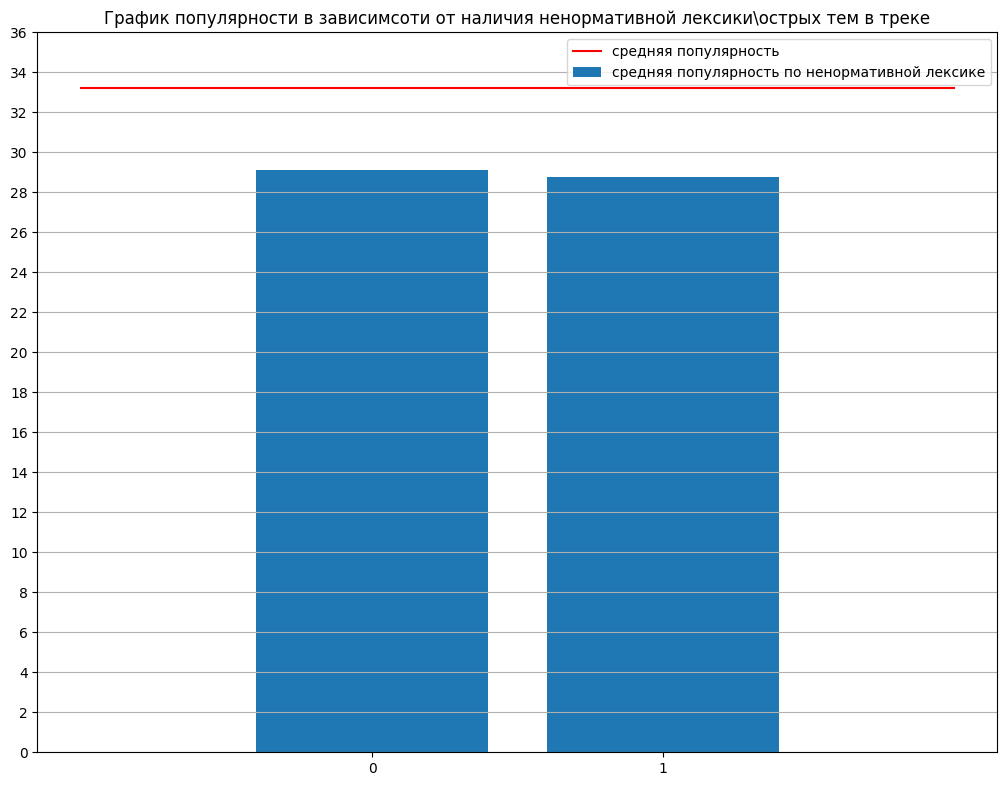

In [115]:
ax = plt.axes([0, 0, 1.5, 1.5])
ax.bar(sorted(spotify['explicit'].unique().tolist()), [spotify.loc[(spotify['explicit'] == 0) & (spotify['valence'] <= 0.2)  & (spotify['energy'] >= 0.8), 'popularity'].mean(), spotify.loc[(spotify['explicit'] == 1) & (spotify['valence'] <= 0.2)  & (spotify['energy'] >= 0.8), 'popularity'].mean()], label='средняя популярность по ненормативной лексике')
ax.plot([-1, 0, 1, 2], [33.23882665637418]*4, color='red', label='средняя популярность')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 2, 1)])
ax.set_yticks([x for x in range(0, 38, 2)])
ax.set_title('График популярности в зависимсоти от наличия ненормативной лексики\острых тем в треке')
ax.grid(axis='y')
ax.legend()
plt.show()

> ***ВЫВОД:***
> ***
> Гипотеза не подтвердилась, разницы практически нету.

# **Feature Engineering**

In [116]:
spotify = spotify.copy()

Я хочу добавить столбец, который будет показывать улучшенную информацию о настроении трека, этот слобец будет формироваться из столбцов energy и valence.

In [117]:
mood = [
    'energetic_happy' if valence > 0.7 and energy > 0.7 else  # Энергичный и позитивный
    'calm_happy' if valence > 0.7 and energy < 0.3 else       # Спокойный и позитивный
    'energetic_sad' if valence < 0.3 and energy > 0.7 else    # Энергичный и грустный
    'calm_sad' if valence < 0.3 and energy < 0.3 else         # Спокойный и грустный
    'neutral_energetic' if energy > 0.7 else                  # Нейтральный энергичный
    'neutral_calm' if energy < 0.3 else                       # Нейтральный спокойный
    'balanced'                                                # Сбалансированный
]

NameError: name 'valence' is not defined

In [118]:
def mood_generate(row):
    if row['valence'] > 0.7 and row['energy'] > 0.7:
        return "energetic_happy"
    elif row['valence'] > 0.7 and row['energy'] < 0.3:
        return "calm_happy"
    elif row['valence'] < 0.3 and row['energy'] > 0.7:
        return "energetic_sad"
    elif row['valence'] < 0.3 and row['energy'] < 0.3:
        return "calm_sad"
    elif row['energy'] > 0.7:
        return "neutral_energetic"
    elif row['energy'] < 0.3:
        return "neutral_calm"
    else:
        return "balanced"
spotify['mood'] = spotify.apply(lambda row: mood_generate(row) , axis=1)
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood
id,,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,balanced
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,calm_sad
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,balanced
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,calm_sad
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,balanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,calm_sad
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,calm_sad
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,balanced


> ***Проверим поле mood***

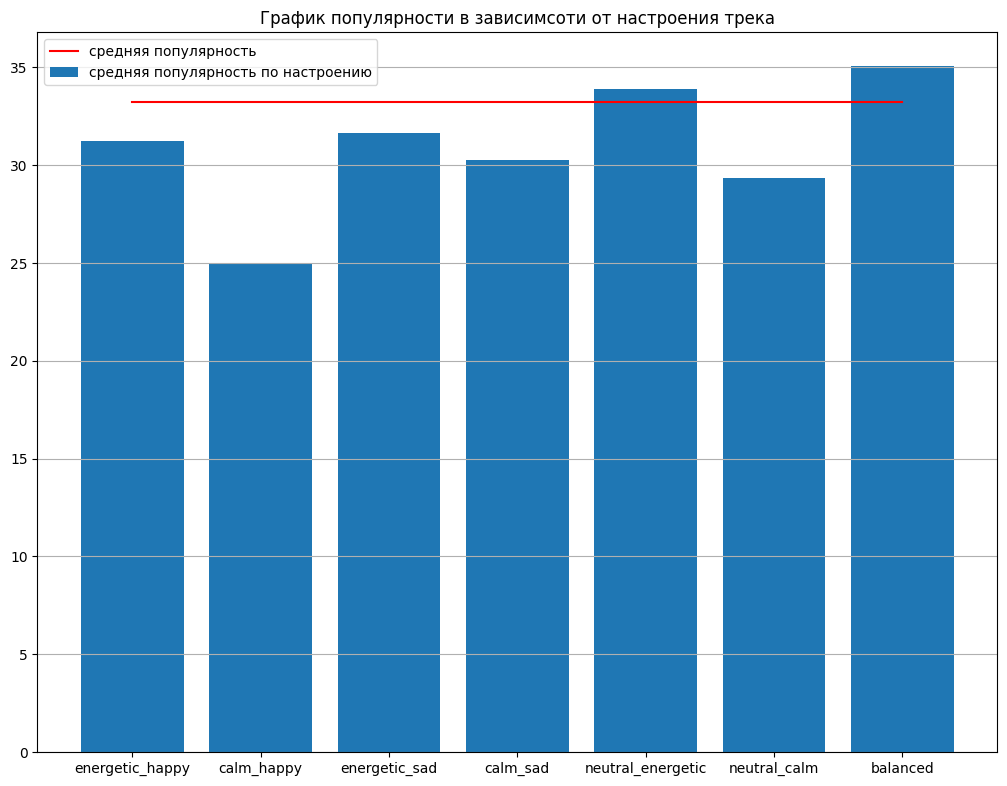

In [119]:
ax = plt.axes([0, 0, 1.5, 1.5])
ax.bar(['energetic_happy','calm_happy','energetic_sad','calm_sad','neutral_energetic','neutral_calm','balanced'], [spotify.loc[spotify['mood'] == "energetic_happy", 'popularity'].mean(), spotify.loc[spotify['mood'] == "calm_happy", 'popularity'].mean(), spotify.loc[spotify['mood'] == "energetic_sad", 'popularity'].mean(), spotify.loc[spotify['mood'] == "calm_sad", 'popularity'].mean(), spotify.loc[spotify['mood'] == "neutral_energetic", 'popularity'].mean(), spotify.loc[spotify['mood'] == "neutral_calm", 'popularity'].mean(), spotify.loc[spotify['mood'] == "balanced", 'popularity'].mean()], label='средняя популярность по настроению')
ax.plot(['energetic_happy','calm_happy','energetic_sad','calm_sad','neutral_energetic','neutral_calm','balanced'], [33.23882665637418]*7, color='red', label='средняя популярность')
ax.set_title('График популярности в зависимсоти от настроения трека')
ax.grid(axis='y')
ax.legend()
plt.show()

> ***ВЫВОД:***
> ***
> Поле mood слабо, но влияет на популярность..

Ещё я хочу добавить столбец, который будет олицетворять нестандартность трека

In [120]:
experimental_score = (
    abs(0.5 - danceability) * 0,5 +  # Отклонение от танцевальных норм
    abs(0.5 - energy) * 0,5 +        # Нестандартная энергетика
    abs(0.5 - valence) * 0.5 +      # Нестандартная эмоциональность
    (time_signature % 2) * 0,25 +    # Нечетные размеры

SyntaxError: incomplete input (2436763244.py, line 5)

In [121]:
def experimental_score_generate(row):
    return abs(0.5 - row['danceability']) * 0.5 + abs(0.5 - row['energy']) * 0.5 + abs(0.5 - row['valence']) * 0.5 + (row['time_signature'] % 2) * 0.25 
spotify['experimental_score'] = spotify.apply(lambda row: experimental_score_generate(row) , axis=1)
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood,experimental_score
id,,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,balanced,0.21500
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,calm_sad,0.32350
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,balanced,0.29150
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,calm_sad,0.76570
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,balanced,0.25400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,calm_sad,0.77955
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,calm_sad,0.58700
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,balanced,0.27150


> ***Проверим поле experimental_score***

In [123]:
name = 'experimental_score'
id = 1
for i in [20, 25, 50, 100]:
    exec(f"unique_{name}{str(id)} = [[x/{i}, round(x/{i}+{1/i}, 2)] for x in range(0, {i})]")
    id+=1

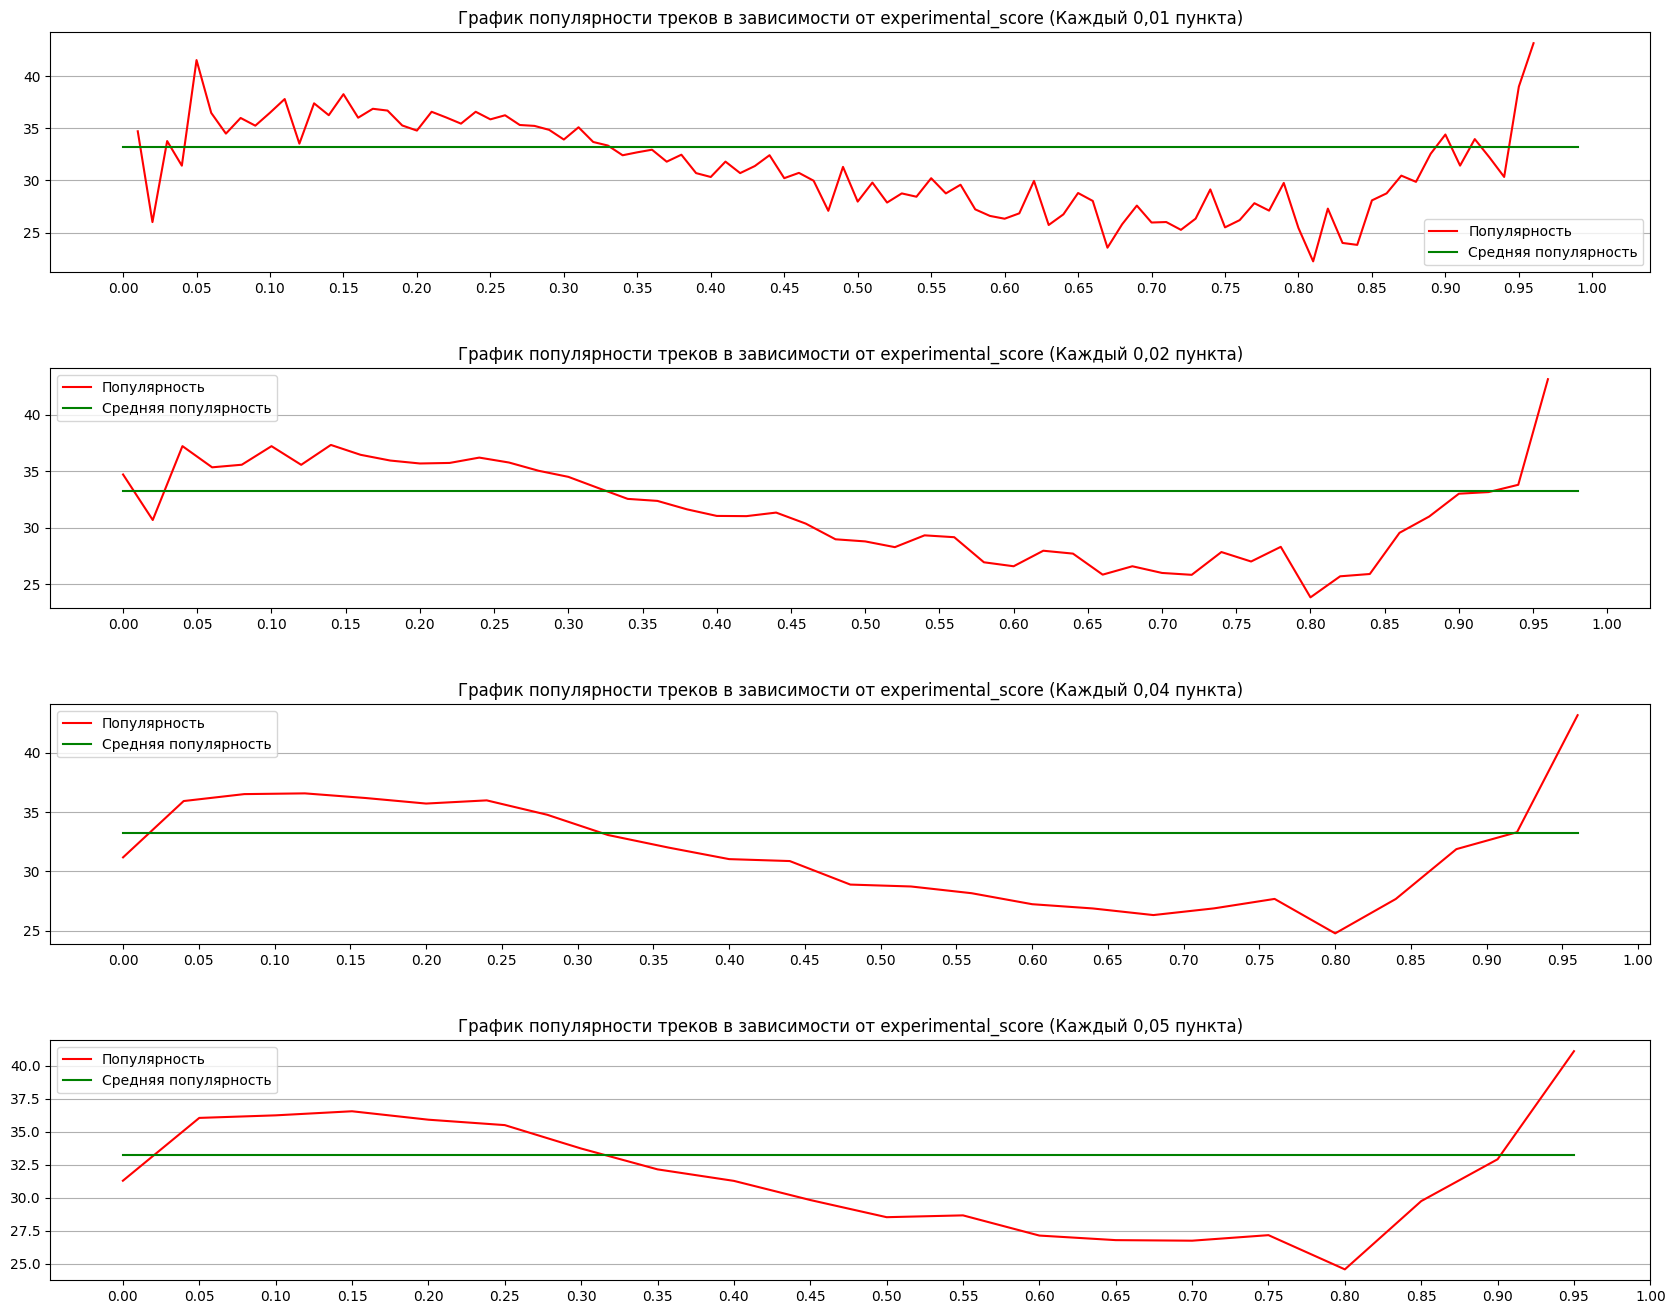

In [124]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'experimental_score'
uniques = unique_valence1
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax1.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax1.set_title('График популярности треков в зависимости от experimental_score (Каждый 0,05 пункта)')
ax1.grid(axis='y')
uniques = unique_valence2
ax2 = plt.axes([0, 0.7, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax2.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax2.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax2.set_title('График популярности треков в зависимости от experimental_score (Каждый 0,04 пункта)')
ax2.grid(axis='y')
uniques = unique_valence3
ax3 = plt.axes([0, 1.4, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax3.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax3.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax3.set_title('График популярности треков в зависимости от experimental_score (Каждый 0,02 пункта)')
ax3.grid(axis='y')
uniques = unique_valence4
ax4 = plt.axes([0, 2.1, 2.5, 0.5])
mean_popularity = []
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].mean())
ax4.plot([x[0] for x in uniques], mean_popularity, color='red', label='Популярность')
ax4.plot([x[0] for x in uniques], [33.23882665637418]*len(uniques), color='green', label='Средняя популярность')
ax4.set_title('График популярности треков в зависимости от experimental_score (Каждый 0,01 пункта)')
ax4.grid(axis='y')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

x_range = [x/20 for x in range(0, 21)]
ax1.set_xticks(x_range)
ax2.set_xticks(x_range)
ax3.set_xticks(x_range)
ax4.set_xticks(x_range)

plt.show()

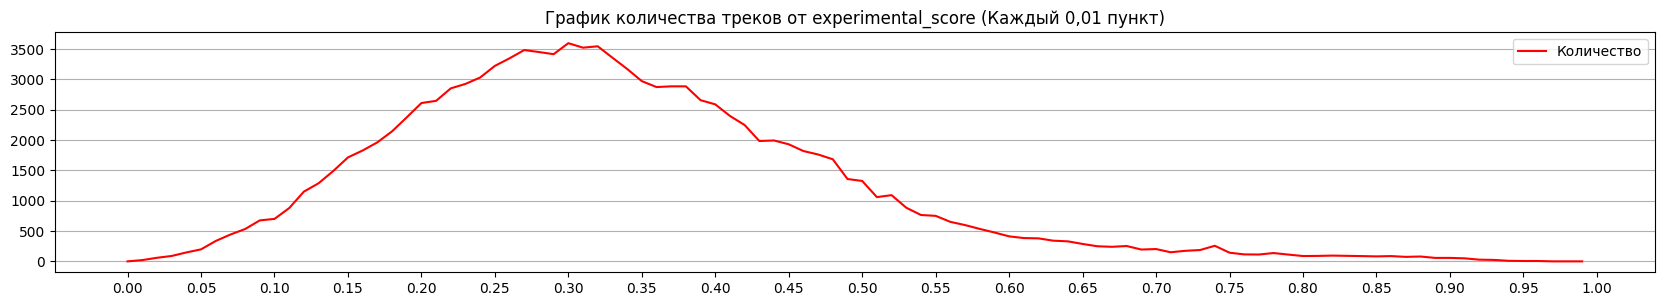

In [125]:
ax1 = plt.axes([0, 0, 2.5, 0.5])
mean_popularity = []
name = 'experimental_score'
uniques = unique_valence4
for unique in uniques:
    mean_popularity.append(spotify.loc[(spotify[name] >= unique[0]) & (spotify[name] < unique[1]), 'popularity'].count())
ax1.plot([x[0] for x in uniques], mean_popularity, color='red', label='Количество')
ax1.set_title('График количества треков от experimental_score (Каждый 0,01 пункт)')
ax1.set_xticks([x/20 for x in range(0, 21)])
ax1.legend()
ax1.grid(axis='y')

> ***ВЫВОД:***
> ***
> Поле experimental_score влияет на популярность, причём большинство песен имеют низкую эксперементальность и количество треков по эксперементальности распределены соответственно нормальному распеределению с максимумом в значении 0.3, в максимуме популярность равна средней, при эксперементальности ниже 0.3, популярность немного выше средней, а при эксперементальности выше 0.3 популярность ниже средней.

# ***Эксперименты с моделями машинного обучения/глубокого обучения (Начало)***

# **Векторизация**

Закодируем все текстовые значения в числовые с помощью LabelEncoder

In [126]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = spotify.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    spotify[col] = le.fit_transform(spotify[col])
    label_encoders[col] = le
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood,experimental_score
id,,,,,,,,,,,,,,,,,,,,,
0,62845,10357,8100,11741,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,0,0.21500
1,55667,3287,14796,22528,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,2,0.32350
2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,0,0.29150
3,77941,14839,8580,9580,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,2,0.76570
4,68241,5255,16899,25689,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,0,0.25400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,25198,22486,66,53329,21,384999,False,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113,2,0.77955
113996,19583,22486,66,65090,22,385000,False,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113,2,0.58700
113997,80126,4952,5028,38207,22,271466,False,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113,0,0.27150


In [127]:
spotify.isnull().sum()

track_id              0
artists               0
album_name            0
track_name            0
popularity            0
duration_ms           0
explicit              0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
track_genre           0
mood                  0
experimental_score    0
dtype: int64

Все столбцы векторизованы

# **Машинное обучение**

Для сравнения моделей буду использовать R² Score (Больше лучше) и RMSE (Меньше лучше)

1. R² Score (Коэффициент детерминации)
Что показывает: Насколько хорошо модель объясняет изменчивость данных относительно простого среднего значения.
2. RMSE (Root Mean Squared Error)
Что показывает: Среднюю величину ошибки в исходных единицах измерения (например, если предсказываем популярность от 0 до 100, RMSE тоже будет в этих единицах).
3. MAE (Mean Absolute Error)
Что показывает: Среднее абсолютное отклонение прогнозов от реальных значений.
4. MAPE (Mean Absolute Percentage Error)
Что показывает: Среднюю процентную ошибку прогноза относительно реальных значений.
5. Explained Variance (Объяснённая дисперсия)
Что показывает: Долю дисперсии целевой переменной, которую модель смогла объяснить.
6. Max Error (Максимальная ошибка)
Что показывает: Самую большую ошибку, которую совершила модель.
7. MSE (Mean Squared Error)
Что показывает: Средний квадрат ошибок (RMSE без квадратного корня).

In [128]:
X = spotify.drop(columns=['popularity'])
Y = spotify['popularity']

> ***Линейная модель***

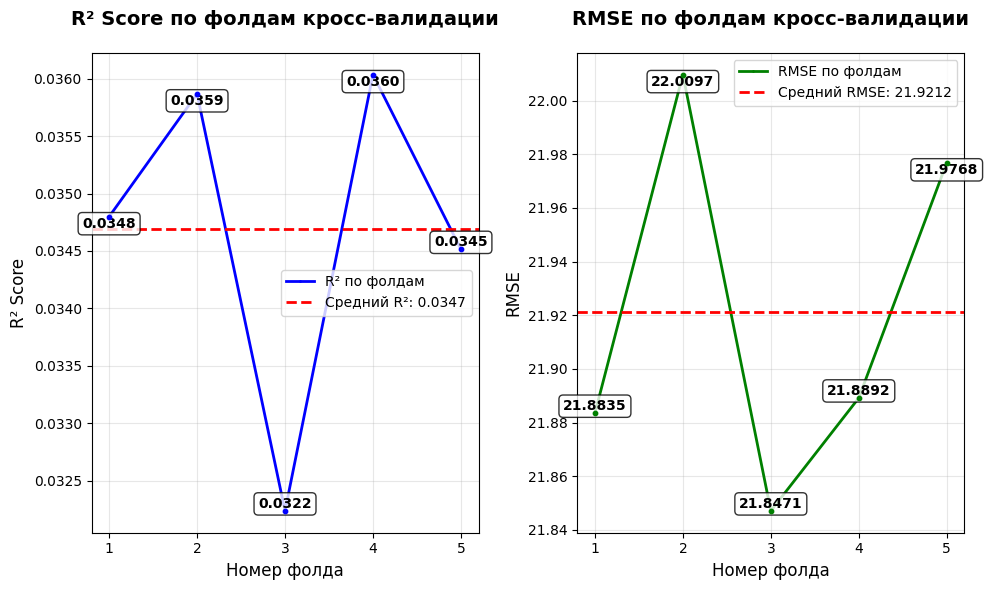

Кросс-валидация результаты:
------------------------------------------
------------------------------------------
R² Score: [0.03479806 0.03586781 0.03223655 0.03603528 0.03451371]
Средний R²: 0.0347 (+/- 0.0027)
------------------------------------------
------------------------------------------
RMSE: [21.88347254 22.0096696  21.84705066 21.88915799 21.9767827 ]
Средний RMSE: 21.9212 (+/- 0.1228)
------------------------------------------
------------------------------------------
MAE: [18.19893633 18.33912034 18.16333265 18.2508971  18.25063403]
Средний MAE: 18.2406 (+/- 0.1187)
------------------------------------------
------------------------------------------
MAPE (%): [2.04115904e+18 2.14551277e+18 2.11376184e+18 2.09526725e+18
 2.09766308e+18]
Средний MAPE: 2098672795408794112.0000% (+/- 67776763377611472.0000%)
------------------------------------------
------------------------------------------
Explained Variance: [0.03494828 0.03587155 0.03236287 0.03604325 0.03452836]
----

In [129]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Добавляем кросс-валидацию с 5 фолдами для метрик регрессии
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mape': 'neg_mean_absolute_percentage_error',
    'explained_variance': 'explained_variance',
    'max_error': 'max_error'
}

cv_results = cross_validate(linear_model, X_train, Y_train, cv=5, scoring=scoring)

# 1. График для R² Score
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Первый график

# Значения R² по фолдам
r2_scores = cv_results['test_r2']
fold_numbers = list(range(1, len(r2_scores) + 1))

# График R²
plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

# Средняя линия
mean_r2 = np.mean(r2_scores)
plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

# Настройки графика R²
plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Номер фолда', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(fold_numbers)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# Добавляем значения на график
for i, score in enumerate(r2_scores):
    plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
             fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# 2. График для RMSE
plt.subplot(1, 2, 2)  # Второй график

# Значения RMSE по фолдам (умножаем на -1)
rmse_scores = -cv_results['test_neg_rmse']

# График RMSE
plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

# Средняя линия
mean_rmse = np.mean(rmse_scores)
plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

# Настройки графика RMSE
plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Номер фолда', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(fold_numbers)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# Добавляем значения на график
for i, score in enumerate(rmse_scores):
    plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
             fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("Кросс-валидация результаты:")
print("------------------------------------------")
print("------------------------------------------")
print(f"R² Score: {cv_results['test_r2']}")

print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"RMSE: {-cv_results['test_neg_rmse']}")

print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"MAE: {-cv_results['test_neg_mae']}")

print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")

print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
print("------------------------------------------")
print("------------------------------------------")
print(f"Explained Variance: {cv_results['test_explained_variance']}")
print("------------------------------------------")
print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"Max Error: {cv_results['test_max_error']}")

print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"MSE: {-cv_results['test_neg_mse']}")

print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")

> ***Древесная модель***

In [130]:
from sklearn.tree import DecisionTreeRegressor
# Добавляем кросс-валидацию с 5 фолдами
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mape': 'neg_mean_absolute_percentage_error',
    'explained_variance': 'explained_variance',
    'max_error': 'max_error'
}
metrics = []
depths = range(1, 16)
for depth in depths:
    current_tree = DecisionTreeRegressor(max_depth=depth)

    cv_results = cross_validate(current_tree, X_train, Y_train, cv=5, scoring=scoring)

    metrics.append([depth, cv_results['test_r2'].mean(), -cv_results['test_neg_rmse'].mean(), cv_results])

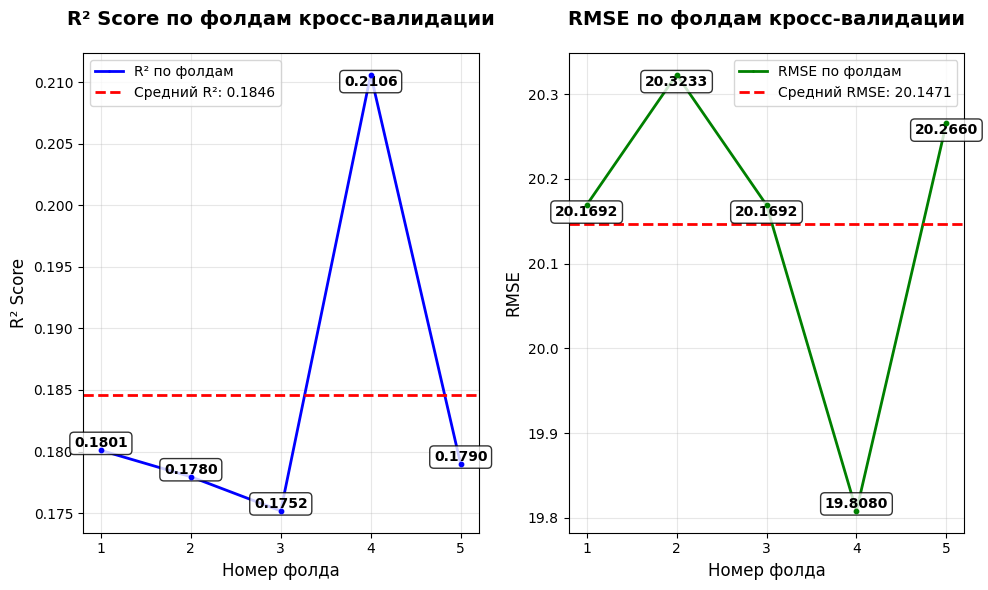

Лучший результат с глубиной 13
Кросс-валидация результаты:
------------------------------------------
R² Score: [0.18009471 0.17795138 0.17517592 0.21062266 0.1789812 ]
Средний R²: 0.1846 (+/- 0.0263)
------------------------------------------
RMSE: [20.16921477 20.32328855 20.16920937 19.80800845 20.26597995]
Средний RMSE: 20.1471 (+/- 0.3590)
------------------------------------------
MAE: [15.15978199 15.13530523 15.3647955  14.51257804 15.30238396]
Средний MAE: 15.0950 (+/- 0.6072)
------------------------------------------
MAPE (%): [1.35337108e+18 1.39159133e+18 1.42428131e+18 1.30342146e+18
 1.42131910e+18]
Средний MAPE: 1378796855450479104.0000% (+/- 91076211994384544.0000%)
------------------------------------------
Explained Variance: [0.1802007  0.17795277 0.17529333 0.21062278 0.17899184]
Средняя Explained Variance: 0.1846 (+/- 0.0262)
------------------------------------------
Max Error: [-84.         -89.         -86.         -92.34246575 -88.        ]
Средний Max Error: 

In [131]:
for i in range(len(metrics)):
    min_rmse = min(metrics, key=lambda x: x[2])
    max_r2 = max(metrics, key=lambda x: x[1])
    if max_r2 == min_rmse:
        cv_results = max_r2[3]
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()

        print(f"Лучший результат с глубиной {max_r2[0]}")
            
        # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        break
    else:
        cv_results = max_r2[3]
        print(f"Лучший результат R² Score с глубиной {max_r2[0]}")
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()
         # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        
        cv_results = min_rmse[3]
        print(f"Лучший результат RMSE с глубиной {max_r2[0]}")
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()
         # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        break

> ***Модель градиентного бустинга***

In [132]:
from xgboost import XGBRegressor
# Добавляем кросс-валидацию с 5 фолдами для подбора гиперпараметров XGBoost
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mape': 'neg_mean_absolute_percentage_error',
    'explained_variance': 'explained_variance',
    'max_error': 'max_error'
}

metrics = []
n_estimators_list = range(50, 70, 10)
max_depth_list = range(1, 6)
learning_rate_list = [x/100 for x in range(7, 15)]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for learning_rate in learning_rate_list:
            grad_model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, eval_metric='logloss')

            cv_results = cross_validate(grad_model, X_train, Y_train, cv=5, scoring=scoring)
            metrics.append([[n_estimators, max_depth, learning_rate], cv_results['test_r2'].mean(), -cv_results['test_neg_rmse'].mean(), cv_results])

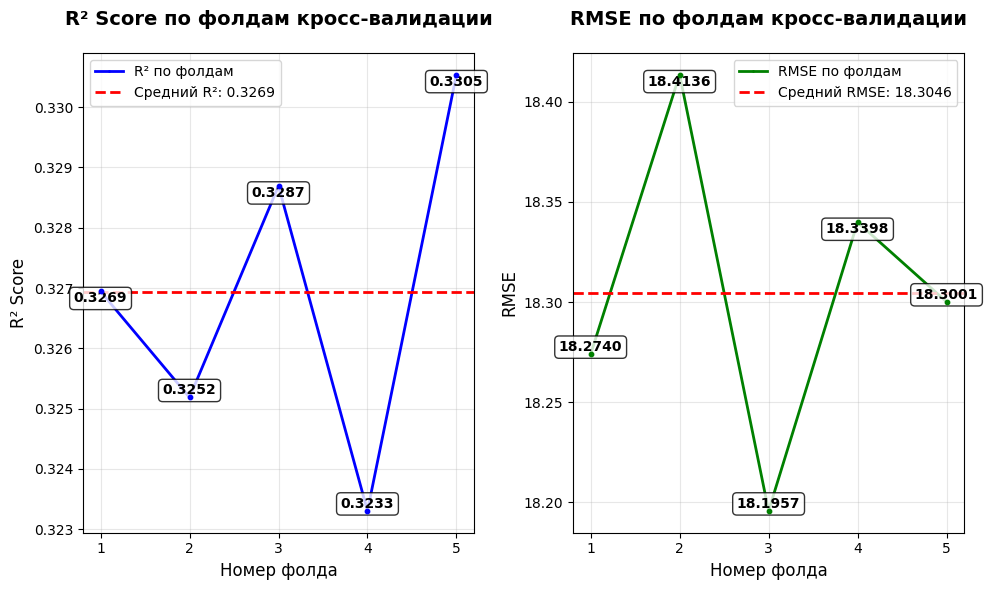

Лучший результат с гипперпараметрами [60, 5, 0.14]
Кросс-валидация результаты:
------------------------------------------
R² Score: [0.32694264 0.32518461 0.3286925  0.3233036  0.33053903]
Средний R²: 0.3269 (+/- 0.0051)
------------------------------------------
RMSE: [18.27398158 18.41355825 18.19570795 18.33983479 18.30010949]
Средний RMSE: 18.3046 (+/- 0.1440)
------------------------------------------
MAE: [14.38638814 14.44284221 14.28042699 14.42930104 14.37611963]
Средний MAE: 14.3830 (+/- 0.1142)
------------------------------------------
MAPE (%): [1.49732997e+18 1.59342064e+18 1.59299588e+18 1.58154271e+18
 1.57683738e+18]
Средний MAPE: 1568425316169740288.0000% (+/- 72254300847813120.0000%)
------------------------------------------
Explained Variance: [0.32710514 0.32519055 0.32888607 0.3233173  0.33053935]
Средняя Explained Variance: 0.3270 (+/- 0.0051)
------------------------------------------
Max Error: [-72.30972195 -73.34405899 -67.48740768 -66.89190865 -70.28020096]

In [133]:
for i in range(len(metrics)):
    min_rmse = min(metrics, key=lambda x: x[2])
    max_r2 = max(metrics, key=lambda x: x[1])
    if max_r2 == min_rmse:
        cv_results = max_r2[3]
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()

        print(f"Лучший результат с гипперпараметрами {max_r2[0]}")
            
        # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        break
    else:
        cv_results = max_r2[3]
        print(f"Лучший результат R² Score с гипперпараметрами {max_r2[0]}")
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()
         # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        
        cv_results = min_rmse[3]
        print(f"Лучший результат RMSE с гипперпараметрами {min_rmse[0]}")
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()
         # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        break

> ***Нейросетевая модель***

Перебирать параметры циклом, было слишком долго, я в ручную перебрал несколько и этот был наилучшим.

In [134]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

# Добавляем кросс-валидацию с 5 фолдами для подбора гиперпараметров нейросети
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mape': 'neg_mean_absolute_percentage_error',
    'explained_variance': 'explained_variance',
    'max_error': 'max_error'
}
metrics = []
hidden_layer_sizes_list = [(100, 100)]  # Архитектуры сети
activation_list = ['relu']  # Функции активации
learning_rate_list = ['adaptive']  # Стратегии обучения

for hidden_layer_sizes in hidden_layer_sizes_list:
    for activation in activation_list:
        for learning_rate in learning_rate_list:
            nn_model = MLPRegressor(
                hidden_layer_sizes=hidden_layer_sizes,
                activation=activation,
                learning_rate=learning_rate,
                max_iter=40,
                random_state=42
            )

            cv_results = cross_validate(nn_model, X_train, Y_train, cv=5, scoring=scoring)
            
            metrics.append([[hidden_layer_sizes, activation, learning_rate], cv_results['test_r2'].mean(), -cv_results['test_neg_rmse'].mean(), cv_results])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

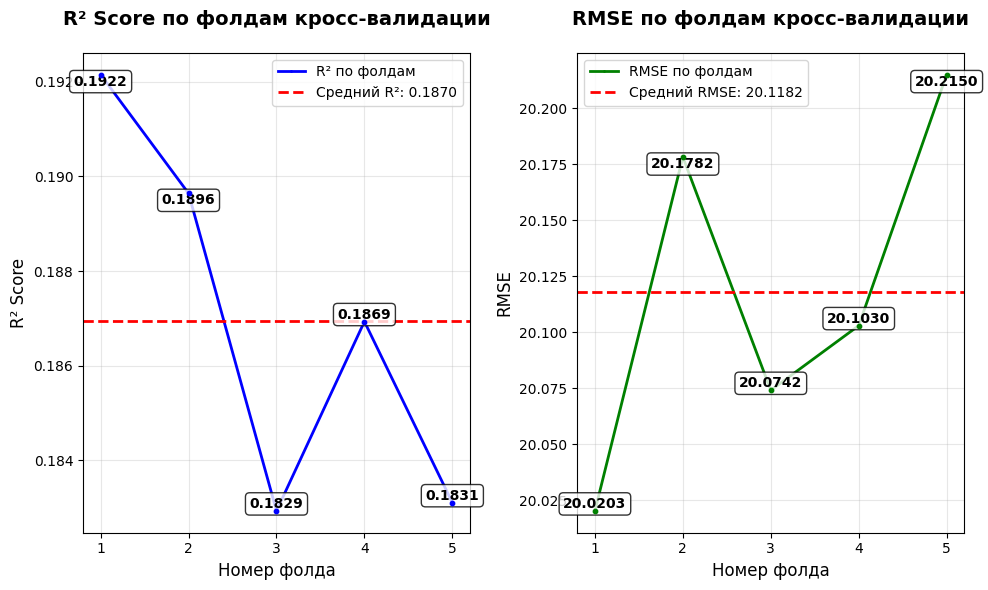

Лучший результат с гипперпараметрами [(100, 100), 'relu', 'adaptive']
Кросс-валидация результаты:
------------------------------------------
R² Score: [0.19215339 0.18964371 0.18293185 0.18693401 0.18310549]
Средний R²: 0.1870 (+/- 0.0072)
------------------------------------------
RMSE: [20.0203469  20.17823775 20.07415849 20.1030236  20.21501396]
Средний RMSE: 20.1182 (+/- 0.1406)
------------------------------------------
MAE: [16.00132632 16.13529118 16.03590742 16.10296677 16.15859336]
Средний MAE: 16.0868 (+/- 0.1189)
------------------------------------------
MAPE (%): [1.58283010e+18 1.70154555e+18 1.72233306e+18 1.79249557e+18
 1.73698702e+18]
Средний MAPE: 1707238260655959552.0000% (+/- 138250349442508880.0000%)
------------------------------------------
Explained Variance: [0.19580945 0.190569   0.18392377 0.19089549 0.18363721]
Средняя Explained Variance: 0.1890 (+/- 0.0092)
------------------------------------------
Max Error: [-80.9987004  -72.53641347 -74.61600549 -79.43

In [135]:
for i in range(len(metrics)):
    min_rmse = min(metrics, key=lambda x: x[2])
    max_r2 = max(metrics, key=lambda x: x[1])
    if max_r2 == min_rmse:
        cv_results = max_r2[3]
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()

        print(f"Лучший результат с гипперпараметрами {max_r2[0]}")
            
        # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        break
    else:
        cv_results = max_r2[3]
        print(f"Лучший результат R² Score с гипперпараметрами {max_r2[0]}")
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()
         # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        
        cv_results = min_rmse[3]
        print(f"Лучший результат RMSE с гипперпараметрами {min_rmse[0]}")
        # 1. График для R² Score
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)  # Первый график

        # Значения R² по фолдам
        r2_scores = cv_results['test_r2']
        fold_numbers = list(range(1, len(r2_scores) + 1))

        # График R²
        plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
        plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

        # Средняя линия
        mean_r2 = np.mean(r2_scores)
        plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

        # Настройки графика R²
        plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('R² Score', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(r2_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        # 2. График для RMSE
        plt.subplot(1, 2, 2)  # Второй график

        # Значения RMSE по фолдам (умножаем на -1)
        rmse_scores = -cv_results['test_neg_rmse']

        # График RMSE
        plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
        plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

        # Средняя линия
        mean_rmse = np.mean(rmse_scores)
        plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

        # Настройки графика RMSE
        plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Номер фолда', fontsize=12)
        plt.ylabel('RMSE', fontsize=12)
        plt.xticks(fold_numbers)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='best')

        # Добавляем значения на график
        for i, score in enumerate(rmse_scores):
            plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
                fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

        plt.tight_layout()
        plt.show()
         # Выводим результаты кросс-валидации
        print("Кросс-валидация результаты:")
        print("------------------------------------------")
        print(f"R² Score: {cv_results['test_r2']}")
        print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"RMSE: {-cv_results['test_neg_rmse']}")
        print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAE: {-cv_results['test_neg_mae']}")
        print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")
        print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
        print("------------------------------------------")
        print(f"Explained Variance: {cv_results['test_explained_variance']}")
        print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"Max Error: {cv_results['test_max_error']}")
        print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
        print("------------------------------------------")
        print(f"MSE: {-cv_results['test_neg_mse']}")
        print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")
        break

По итогам проверки выяснилось, что лучшая модель это модель градиентого бустинга, средний R²: 0.3269,
средний RMSE: 18.3046.
Подберём для неё лучшие параментры с помощью optuna

[I 2025-12-19 16:26:35,972] A new study created in memory with name: xgboost_hyperparameter_optimization


Начинаем оптимизацию гиперпараметров с Optuna...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-12-19 16:26:57,029] Trial 0 finished with value: 0.4411669338563346 and parameters: {'n_estimators': 199, 'max_depth': 9, 'learning_rate': 0.022454035151992492, 'subsample': 0.691716298161501, 'colsample_bytree': 0.8574964893815759, 'reg_alpha': 0.03055817587312882, 'reg_lambda': 1.1275346758288628e-07, 'min_child_weight': 6, 'gamma': 4.583766819632899}. Best is trial 0 with value: 0.4411669338563346.
[I 2025-12-19 16:27:04,872] Trial 1 finished with value: 0.34700184163696485 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.03325426938216437, 'subsample': 0.9422717869996935, 'colsample_bytree': 0.8595431279875374, 'reg_alpha': 0.22520356051264526, 'reg_lambda': 9.757861664010617e-07, 'min_child_weight': 5, 'gamma': 4.004697116831205}. Best is trial 0 with value: 0.4411669338563346.
[I 2025-12-19 16:27:25,283] Trial 2 finished with value: 0.6150210029344356 and parameters: {'n_estimators': 215, 'max_depth': 10, 'learning_rate': 0.10140135407965953, 'subs

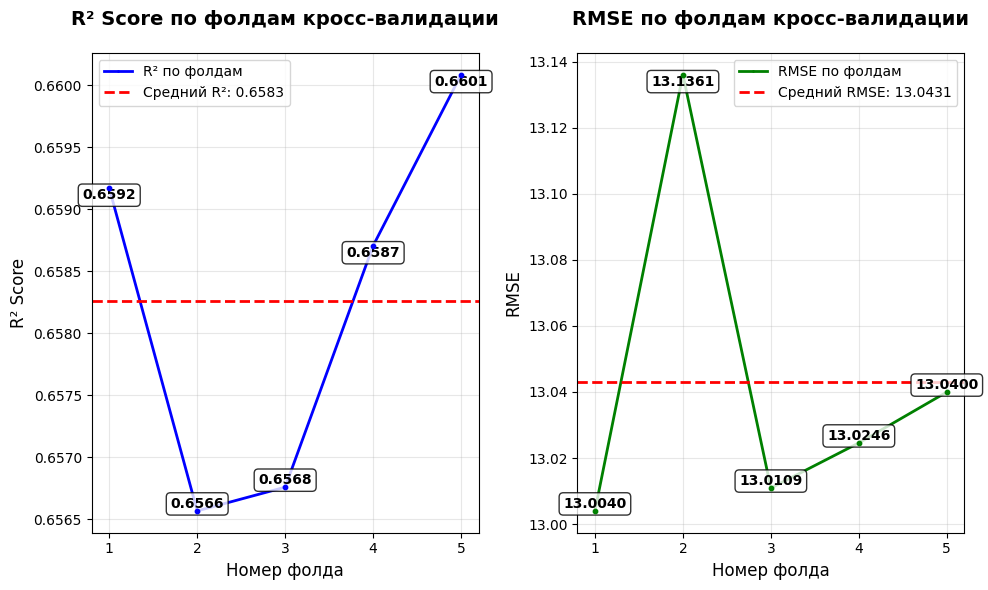

Кросс-валидация результаты:
------------------------------------------
------------------------------------------
R² Score: [0.65916883 0.65656771 0.65675906 0.65870505 0.66008435]
Средний R²: 0.6583 (+/- 0.0028)
------------------------------------------
------------------------------------------
RMSE: [13.00399516 13.13608027 13.0109124  13.02457062 13.03997133]
Средний RMSE: 13.0431 (+/- 0.0962)
------------------------------------------
------------------------------------------
MAE: [9.36553956 9.53003249 9.40903019 9.38838933 9.43343291]
Средний MAE: 9.4253 (+/- 0.1140)
------------------------------------------
------------------------------------------
MAPE (%): [7.05097543e+17 7.58314391e+17 7.38773475e+17 7.20965186e+17
 7.34887607e+17]
Средний MAPE: 731607640533031424.0000% (+/- 35680863618548012.0000%)
------------------------------------------
------------------------------------------
Explained Variance: [0.65921685 0.65657033 0.65677464 0.65874451 0.660106  ]
-----------

In [136]:
import optuna

# Определяем метрики для оценки
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mape': 'neg_mean_absolute_percentage_error',
    'explained_variance': 'explained_variance',
    'max_error': 'max_error'
}

def objective(trial):

    # Предлагаем значения гиперпараметров
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }
    
    # Создаем модель
    model = XGBRegressor(**param)
    
    # Кросс-валидация с 5 фолдами
    cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)
    
    # Вычисляем средний r2 как основную метрику для оптимизации
    mean_r2 = cv_results['test_r2'].mean()
    
    # Сохраняем все метрики для отображения
    trial.set_user_attr('neg_mse', cv_results['test_neg_mse'].mean())
    trial.set_user_attr('neg_rmse', -cv_results['test_neg_rmse'].mean())
    trial.set_user_attr('neg_mae', -cv_results['test_neg_mae'].mean())
    trial.set_user_attr('neg_mape', -cv_results['test_neg_mape'].mean())
    trial.set_user_attr('explained_variance', cv_results['test_explained_variance'].mean())
    trial.set_user_attr('max_error', -cv_results['test_max_error'].mean())
    
    return mean_r2

# Создаем исследование
study = optuna.create_study(
    direction='maximize',
    study_name='xgboost_hyperparameter_optimization'
)

# Запускаем оптимизацию
print("Начинаем оптимизацию гиперпараметров с Optuna...")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Выводим результаты
print("Лучшие параметры:")
best_params = study.best_params
for param, value in best_params.items():
    print(f"{param}: {value}")

print(f"\nЛучший R2-score: {study.best_value:.4f}")

# Выводим все метрики для лучшего trial
best_trial = study.best_trial
print(f"\nВсе метрики для лучшей модели:")
print(f"MSE: {best_trial.user_attrs['neg_mse']:.4f}")
print(f"RMSE: {best_trial.user_attrs['neg_rmse']:.4f}")
print(f"MAE: {best_trial.user_attrs['neg_mae']:.4f}")
print(f"R² Score: {study.best_value:.4f}")
print(f"MAPE: {best_trial.user_attrs['neg_mape']:.4f}")
print(f"Explained Variance: {best_trial.user_attrs['explained_variance']:.4f}")
print(f"Max Error: {best_trial.user_attrs['max_error']:.4f}")

# Обучаем финальную модель с лучшими параметрами
print("Обучение финальной модели:")

best_grad_model = XGBRegressor(**best_params, eval_metric='logloss', random_state=42)
best_grad_model.fit(
    X_train, Y_train,
    eval_set=[(X_train, Y_train), (X_test, Y_test)],
    verbose=False
)

cv_results = cross_validate(best_grad_model, X_train, Y_train, cv=5, scoring=scoring)

# 1. График для R² Score
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Первый график

# Значения R² по фолдам
r2_scores = cv_results['test_r2']
fold_numbers = list(range(1, len(r2_scores) + 1))

# График R²
plt.plot(fold_numbers, r2_scores, marker='.', linewidth=2, markersize=2, color='blue', label='R² по фолдам')
plt.scatter(fold_numbers, r2_scores, color='blue', s=10, zorder=5)

# Средняя линия
mean_r2 = np.mean(r2_scores)
plt.axhline(y=mean_r2, color='red', linestyle='--', linewidth=2, label=f'Средний R²: {mean_r2:.4f}')

# Настройки графика R²
plt.title('R² Score по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Номер фолда', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.xticks(fold_numbers)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# Добавляем значения на график
for i, score in enumerate(r2_scores):
    plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_r2 else 'top', 
             fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# 2. График для RMSE
plt.subplot(1, 2, 2)  # Второй график

# Значения RMSE по фолдам (умножаем на -1)
rmse_scores = -cv_results['test_neg_rmse']

# График RMSE
plt.plot(fold_numbers, rmse_scores, marker='.', linewidth=2, markersize=2, color='green', label='RMSE по фолдам')
plt.scatter(fold_numbers, rmse_scores, color='green', s=10, zorder=5)

# Средняя линия
mean_rmse = np.mean(rmse_scores)
plt.axhline(y=mean_rmse, color='red', linestyle='--', linewidth=2, label=f'Средний RMSE: {mean_rmse:.4f}')

# Настройки графика RMSE
plt.title('RMSE по фолдам кросс-валидации', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Номер фолда', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(fold_numbers)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

# Добавляем значения на график
for i, score in enumerate(rmse_scores):
    plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom' if score < mean_rmse else 'top', 
             fontsize=10, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("Кросс-валидация результаты:")
print("------------------------------------------")
print("------------------------------------------")
print(f"R² Score: {cv_results['test_r2']}")

print(f"Средний R²: {cv_results['test_r2'].mean():.4f} (+/- {cv_results['test_r2'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"RMSE: {-cv_results['test_neg_rmse']}")

print(f"Средний RMSE: {-cv_results['test_neg_rmse'].mean():.4f} (+/- {cv_results['test_neg_rmse'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"MAE: {-cv_results['test_neg_mae']}")

print(f"Средний MAE: {-cv_results['test_neg_mae'].mean():.4f} (+/- {cv_results['test_neg_mae'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"MAPE (%): {-cv_results['test_neg_mape'] * 100}")

print(f"Средний MAPE: {-cv_results['test_neg_mape'].mean() * 100:.4f}% (+/- {cv_results['test_neg_mape'].std() * 200:.4f}%)")
print("------------------------------------------")
print("------------------------------------------")
print(f"Explained Variance: {cv_results['test_explained_variance']}")
print("------------------------------------------")
print(f"Средняя Explained Variance: {cv_results['test_explained_variance'].mean():.4f} (+/- {cv_results['test_explained_variance'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"Max Error: {cv_results['test_max_error']}")

print(f"Средний Max Error: {cv_results['test_max_error'].mean():.4f} (+/- {cv_results['test_max_error'].std() * 2:.4f})")
print("------------------------------------------")
print("------------------------------------------")
print(f"MSE: {-cv_results['test_neg_mse']}")

print(f"Средний MSE: {-cv_results['test_neg_mse'].mean():.4f} (+/- {cv_results['test_neg_mse'].std() * 2:.4f})")

# Общий вывод

Мы проверили все корреляции, ввели два дополнительных столбца, а так же нашли лучшую модель машинного обучения, которая решает задачу регрессии